In [1]:
import pandas as pd
import os 
import numpy as np
import seaborn  as sns
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [4]:
data = pd.read_csv(os.path.join( "data", "IID.csv"))
data_1 = pd.read_csv(os.path.join( "data", "IID_1.csv"))
data_2 = pd.read_csv(os.path.join( "data", "IID_2.csv"))
data_1_noniid = pd.read_csv(os.path.join( "data", "NON_IID_FL_1.csv"))
data_2_noniid = pd.read_csv(os.path.join( "data", "NON_IID_FL_2.csv"))

<Axes: >

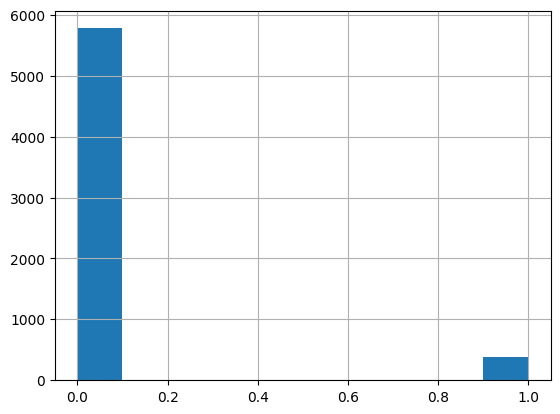

In [3]:
data_1.Fraud.hist()

<Axes: >

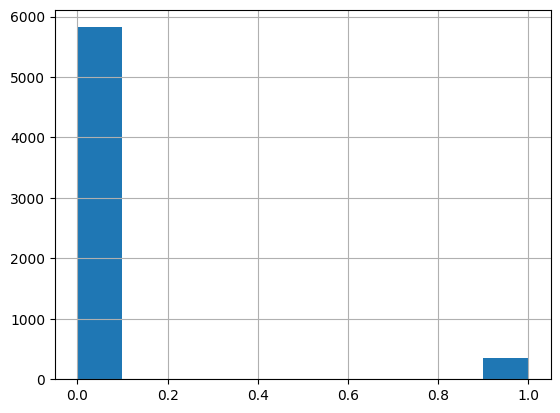

In [4]:
data_2.Fraud.hist()

<Axes: >

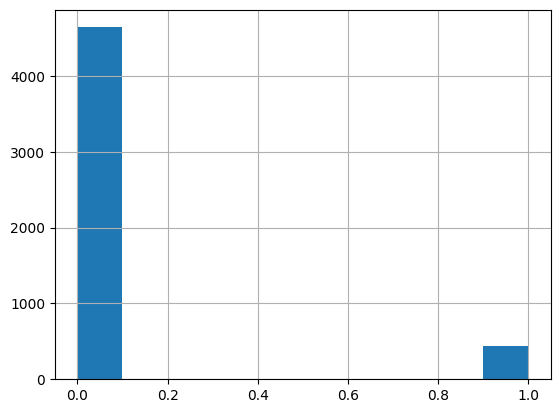

In [5]:
data_1_noniid.Fraud.hist()

<Axes: >

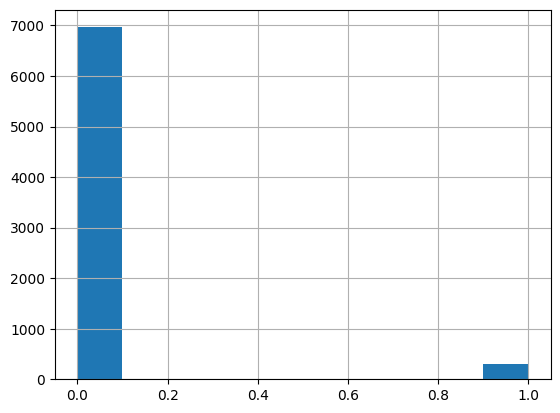

In [6]:
data_2_noniid.Fraud.hist()

In [7]:
print(data_1_noniid.describe())

print(data_2_noniid.describe())



             Month  WeekOfMonth    DayOfWeek         Make  AccidentArea  \
count  5080.000000  5080.000000  5080.000000  5080.000000   5080.000000   
mean      5.555917     2.781197     2.836238    10.125664      0.936238   
std       4.111771     2.694894     3.115307     5.844552      2.395560   
min      -6.641382    -6.449888    -8.265710    -5.806112    -10.335309   
25%       2.502822     0.922431     0.671637     5.682444     -0.699633   
50%       5.619410     2.804796     2.784995    10.458192      0.971009   
75%       8.558691     4.617496     5.003311    14.802664      2.554935   
max      18.511430    11.509973    14.564992    24.446455     10.514968   

       DayOfWeekClaimed  MonthClaimed  WeekOfMonthClaimed          Sex  \
count       5080.000000   5080.000000         5080.000000  5080.000000   
mean           4.233657      6.609983            2.715136     0.744974   
std            3.243622      4.142643            2.657385     2.367029   
min           -8.700726     

In [8]:
chunks = np.array_split(data, 6)

c:\Users\Астемир\.pyenv\pyenv-win\versions\3.10.6\lib\site-packages\numpy\core\fromnumeric.py:59: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


In [12]:
print(chunks[0].shape, chunks[1].shape, chunks[2].shape, chunks[3].shape, chunks[4].shape, chunks[5].shape) 

(2056, 34) (2056, 34) (2056, 34) (2056, 34) (2056, 34) (2056, 34)


In [13]:
df1, df2, df3, df4, df5, df6 = chunks[0], chunks[1], chunks[2], chunks[3], chunks[4], chunks[5]

<Axes: >

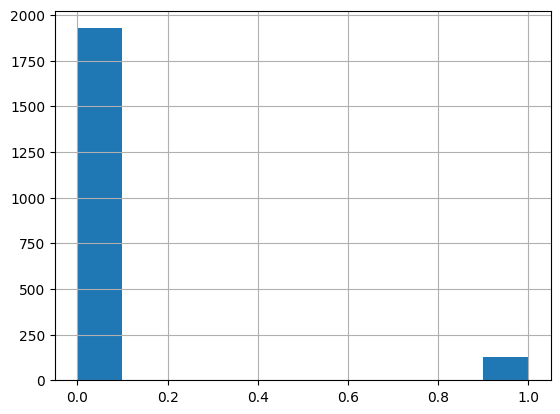

In [15]:
df1.Fraud.hist()

In [ ]:
# df1.to_csv(os.path.join("../engine", "data", "df1.csv"), index=False), df2.to_csv(os.path.join("../engine", "data","df2.csv"), index=False), df3.to_csv(os.path.join("../engine", "data","df3.csv"), index=False), df4.to_csv(os.path.join("../engine", "data","df4.csv"), index=False), df5.to_csv(os.path.join("../engine", "data","df5.csv"), index=False), df6.to_csv(os.path.join("../engine", "data","df6.csv"), index=False)  

(None, None, None, None, None, None)

In [5]:
datanoniid = pd.read_csv(os.path.join("data", "NON_IID.csv"))

In [6]:
print(datanoniid.Fraud.value_counts(), datanoniid.columns)
datanoniid.shape 


Fraud
0    11604
1      732
Name: count, dtype: int64 Index(['Unnamed: 0', 'Month', 'WeekOfMonth', 'DayOfWeek', 'Make',
       'AccidentArea', 'DayOfWeekClaimed', 'MonthClaimed',
       'WeekOfMonthClaimed', 'Sex', 'MaritalStatus', 'Age', 'Fault',
       'PolicyType', 'VehicleCategory', 'VehiclePrice', 'PolicyNumber',
       'RepNumber', 'Deductible', 'DriverRating', 'Days_Policy_Accident',
       'Days_Policy_Claim', 'PastNumberOfClaims', 'AgeOfVehicle',
       'PoliceReportFiled', 'WitnessPresent', 'AgentType',
       'NumberOfSuppliments', 'AddressChange_Claim', 'NumberOfCars', 'Year',
       'BasePolicy', 'AgeGroup', 'VehiclePrice_Cat', 'Fraud'],
      dtype='object')


(12336, 35)

In [10]:
data[200:300].shape 

(100, 34)

In [11]:
(data.iloc[100:].groupby(data.Fraud)).get_group(1)

Month  WeekOfMonth  DayOfWeek  Make  AccidentArea  DayOfWeekClaimed  \
137        0            1          5    17             1                 1   
150        2            4          4    13             0                 7   
194        7            3          3    13             1                 2   
200        1            3          0     0             1                 2   
213        1            2          1     6             1                 5   
...      ...          ...        ...   ...           ...               ...   
12269      2            3          4     2             1                 7   
12277      1            4          0     6             1                 6   
12280      1            3          4    17             1                 1   
12285      7            5          6    13             1                 6   
12333     11            4          0    17             1                 1   

       MonthClaimed  WeekOfMonthClaimed  Sex  MaritalStatus  ...  \
137               1                   2    1              1  ...   
150               5                   1    1              1  ...   
194               8                   4    1              1  ...   
200              12                   1    1              2  ...   
213               2                   3    1              1  ...   
...             ...                 ...  ...            ...  ...   
12269             3                   4    1              1  ...   
12277             2                   5    1              1  ...   
12280             2                   3    1              2  ...   
12285             7                   2    1              2  ...   
12333            11                   4    1              1  ...   

       WitnessPresent  AgentType  NumberOfSuppliments  AddressChange_Claim  \
137                 0          0                    0                    0   
150                 0          0                    3                    0   
194                 0          0                    0                    0   
200                 0          0                    1                    0   
213                 0          0                    6                    0   
...               ...        ...                  ...                  ...   
12269               0          0                    6                    0   
12277               0          0                    0                    0   
12280               0          0                    0                    0   
12285               0          0                    0                    0   
12333               0          1                    6                    0   

       NumberOfCars  Year  BasePolicy  AgeGroup  VehiclePrice_Cat  Fraud  
137               1     0           0      -1.0                 1      1  
150               1     0           1      -1.0                 1      1  
194               1     1           0      -1.0                 2      1  
200               1     0           2      -1.0                 1      1  
213               1     2           1      -1.0                 1      1  
...             ...   ...         ...       ...               ...    ...  
12269             1     1           1      -1.0                 1      1  
12277             1     0           0      -1.0                 0      1  
12280             1     0           0      -1.0                 1      1  
12285             1     1           0      -1.0                 1      1  
12333             3     1           1      -1.0                 1      1  

[722 rows x 34 columns]

In [43]:
datanoniid.drop(columns="Unnamed: 0",inplace=True)

In [44]:
features_set = [(datanoniid.columns)[:i] for i in range(5,20)]


In [7]:
def feature_skew_split(df, feature_cols, target_col=None, n_clients=6, n_clusters=10, seed=42):
    np.random.seed(seed)
  
    df_shuffled = df.sample(frac=1, random_state=seed).reset_index(drop=True)
    X_scaled = StandardScaler().fit_transform(df_shuffled[feature_cols].values)
    
    clusters = KMeans(n_clusters=n_clusters, random_state=seed).fit_predict(X_scaled)
    df_shuffled['cluster'] = clusters
    
    cluster_counts = (df_shuffled.groupby('cluster').size()
                      .reset_index(name='count')
                      .sort_values(by='count', ascending=False)
                      .reset_index(drop=True))
    
    client_cluster_num = [n_clusters // n_clients + (1 if i < n_clusters % n_clients else 0) for i in range(n_clients)]
   
    cluster_assignment = {
        cluster_counts.loc[idx, 'cluster']: client_id 
        for client_id in range(n_clients)
        for idx in range(sum(client_cluster_num[:client_id]), sum(client_cluster_num[:client_id]) + client_cluster_num[client_id])
    }

    client_dfs = {
        client_id: df_shuffled[df_shuffled['cluster'].map(cluster_assignment) == client_id].drop(columns='cluster').copy()
        for client_id in range(n_clients)
    }
    return client_dfs

In [28]:
def feature_skew_split_dirichlet(df, feature_cols, target_col=None, n_clients=6, n_clusters=10, seed=42, alpha=0.5):

    np.random.seed(seed)
    df_shuffled = df.sample(frac=1, random_state=seed).reset_index(drop=True)
    X_scaled = StandardScaler().fit_transform(df_shuffled[feature_cols].values)

    df_shuffled['cluster'] = KMeans(n_clusters=n_clusters, random_state=seed).fit_predict(X_scaled)
    
    client_dfs = {i: [] for i in range(n_clients)}
    for cluster, cluster_data in df_shuffled.groupby('cluster'):
        n = len(cluster_data)
        if n == 0: 
            continue
        proportions = np.random.dirichlet(np.repeat(alpha, n_clients))
        sample_counts = np.random.multinomial(n, proportions)
        
        idxs = np.random.permutation(cluster_data.index)
        splits = np.split(idxs, np.cumsum(sample_counts)[:-1])
        
        [client_dfs.update({client_id: client_dfs[client_id] + [cluster_data.loc[idx]]})
         for client_id, idx in enumerate(splits) if idx.size > 0]
    
    client_dfs = {client_id: (pd.concat(dfs).drop(columns='cluster') if dfs 
                              else pd.DataFrame(columns=df_shuffled.columns.drop('cluster')))
                  for client_id, dfs in client_dfs.items()}
    return client_dfs

In [8]:
col = datanoniid.columns.to_list()
del col[0]


In [9]:
client_datasets = feature_skew_split(datanoniid, feature_cols=col[:10], target_col='target', n_clients=6, n_clusters=20, seed=33)

for client, data in client_datasets.items():
    print(f"Клиент {client}: {len(data)} примеров")

Клиент 0: 3174 примеров
Клиент 1: 2957 примеров
Клиент 2: 2075 примеров
Клиент 3: 1846 примеров
Клиент 4: 1501 примеров
Клиент 5: 783 примеров


In [37]:
[print(client_datasets[i].Fraud.value_counts()) for i in client_datasets.keys()]

Fraud
0    2983
1     191
Name: count, dtype: int64
Fraud
0    2766
1     191
Name: count, dtype: int64
Fraud
0    1975
1     100
Name: count, dtype: int64
Fraud
0    1742
1     104
Name: count, dtype: int64
Fraud
0    1413
1      88
Name: count, dtype: int64
Fraud
0    725
1     58
Name: count, dtype: int64


[None, None, None, None, None, None]

In [32]:
client_datasets[1]

Unnamed: 0  Month  WeekOfMonth  DayOfWeek  Make  AccidentArea  \
2883       11005      9            2          0    17             1   
3842        6746      2            2          5    13             1   
6588        7828      9            2          5    17             1   
5428       11916      3            1          2    17             1   
5080         358      1            1          5    18             1   
...          ...    ...          ...        ...   ...           ...   
8753       14385     11            4          5     0             1   
749        13719      2            1          4     6             1   
3649        9824     11            1          3     2             1   
123        14057      1            3          5     2             1   
2185       12052      3            1          3     6             1   

      DayOfWeekClaimed  MonthClaimed  WeekOfMonthClaimed  Sex  ...  \
2883                 7            10                   4    1  ...   
3842                 7             3                   3    1  ...   
6588                 7            10                   2    1  ...   
5428                 6             4                   4    0  ...   
5080                 7             2                   1    1  ...   
...                ...           ...                 ...  ...  ...   
8753                 6             9                   4    1  ...   
749                  5             5                   4    1  ...   
3649                 6            12                   1    1  ...   
123                  6             2                   4    1  ...   
2185                 5             4                   4    1  ...   

      WitnessPresent  AgentType  NumberOfSuppliments  AddressChange_Claim  \
2883               0          0                    0                    0   
3842               0          0                    1                    0   
6588               0          0                    0                    0   
5428               0          0                    1                    0   
5080               0          0                    0                    0   
...              ...        ...                  ...                  ...   
8753               0          0                    0                    4   
749                0          0                    0                    2   
3649               0          0                    3                    0   
123                0          0                    0                    0   
2185               0          0                    6                    0   

      NumberOfCars  Year  BasePolicy  AgeGroup  VehiclePrice_Cat  Fraud  
2883             1     1           2      -1.0                 1      0  
3842             1     1           0      -1.0                 2      0  
6588             1     1           0      -1.0                 1      1  
5428             1     2           2      -1.0                 1      0  
5080             1     0           1      -1.0                 2      0  
...            ...   ...         ...       ...               ...    ...  
8753             2     2           1      -1.0                 1      0  
749              1     2           2      -1.0                 1      0  
3649             1     1           1      -1.0                 1      0  
123              1     2           1      -1.0                 1      1  
2185             1     2           2      -1.0                 2      0  

[1479 rows x 35 columns]

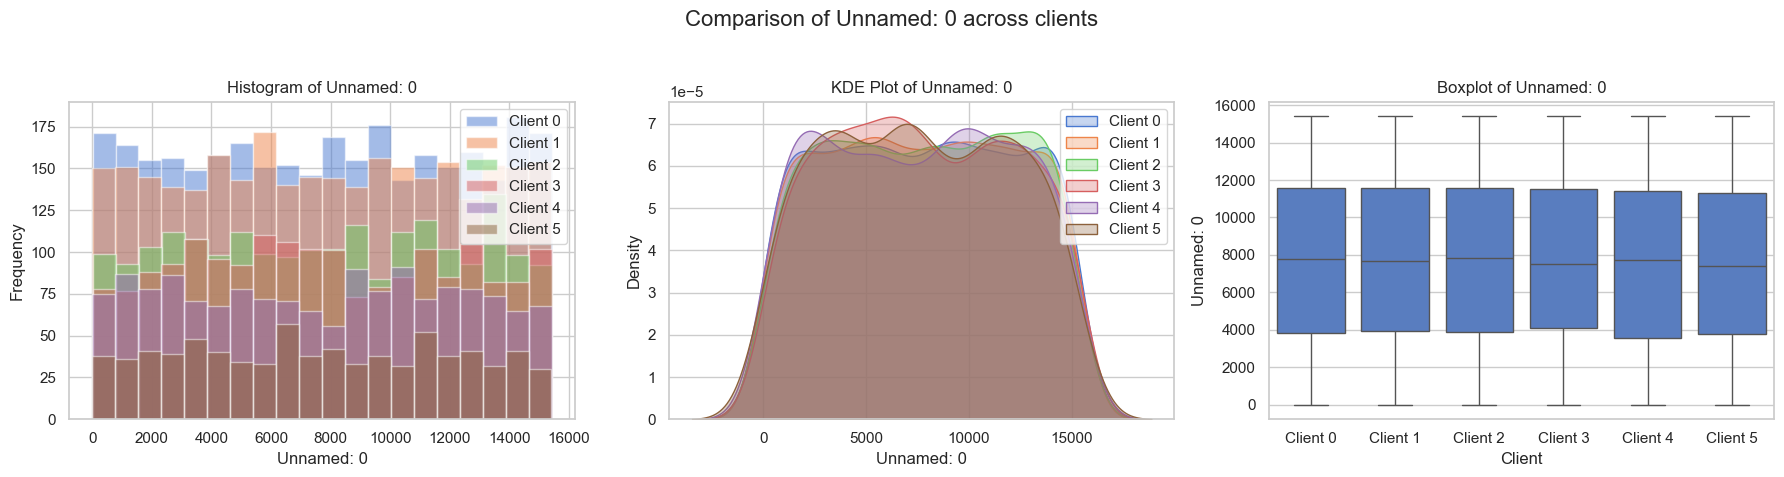

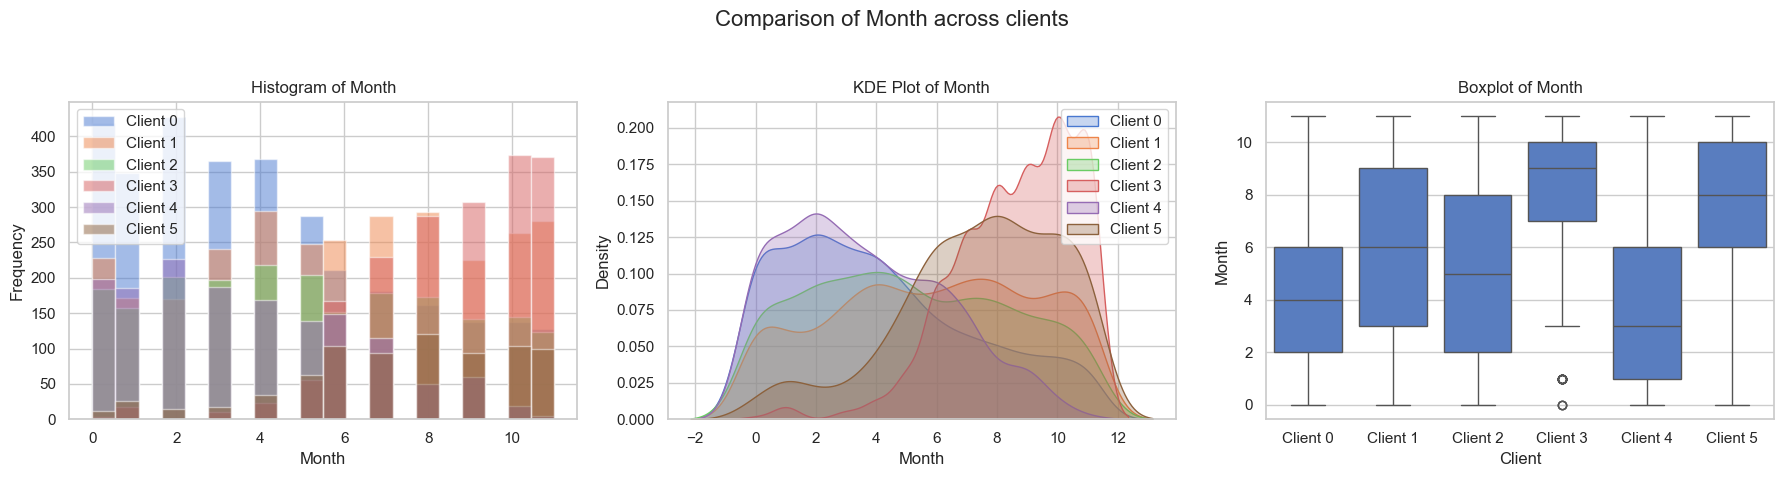

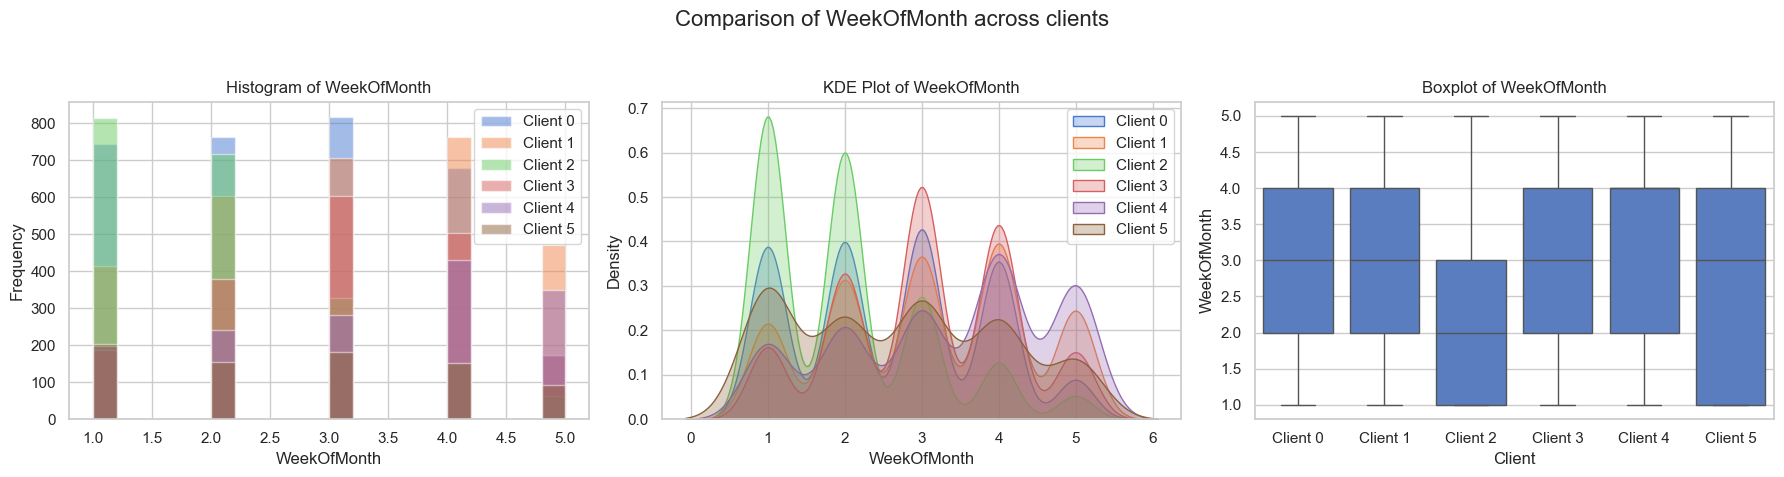

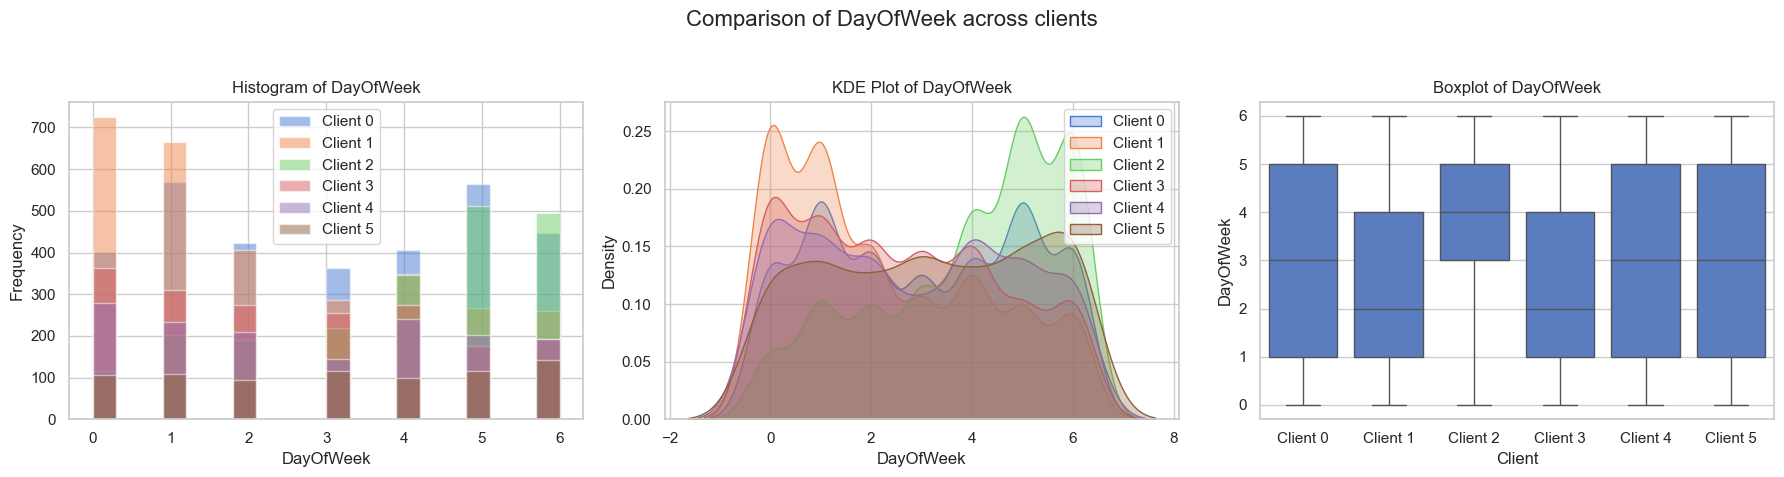

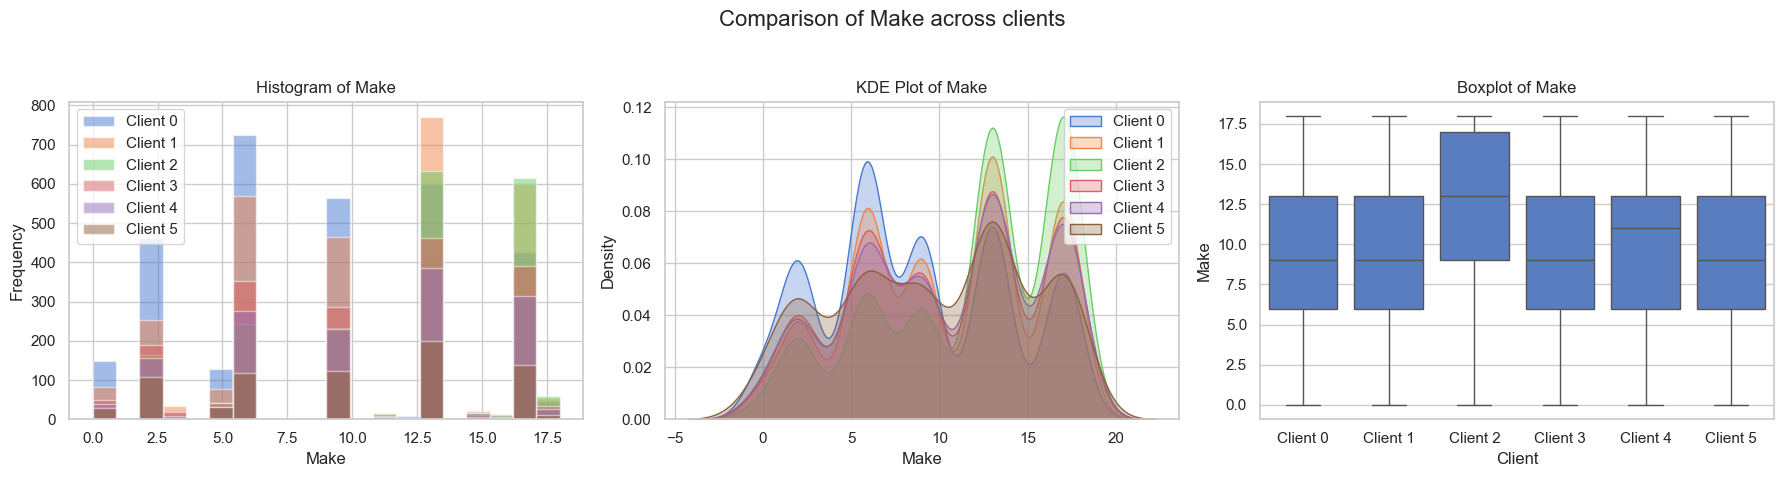

C:\Users\Астемир\AppData\Local\Temp\ipykernel_5744\256699521.py:9: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  [sns.kdeplot(client_datasets[i][feature], ax=axes[1], label=f'Client {i}', fill=True, alpha=0.3) for i in client_datasets]
C:\Users\Астемир\AppData\Local\Temp\ipykernel_5744\256699521.py:9: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  [sns.kdeplot(client_datasets[i][feature], ax=axes[1], label=f'Client {i}', fill=True, alpha=0.3) for i in client_datasets]
C:\Users\Астемир\AppData\Local\Temp\ipykernel_5744\256699521.py:9: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  [sns.kdeplot(client_datasets[i][feature], ax=axes[1], label=f'Client {i}', fill=True, alpha=0.3) for i in client_datasets]
C:\Users\Астемир\AppData\Local\Temp\ipykernel_5744\256699521.py:9: UserWarni

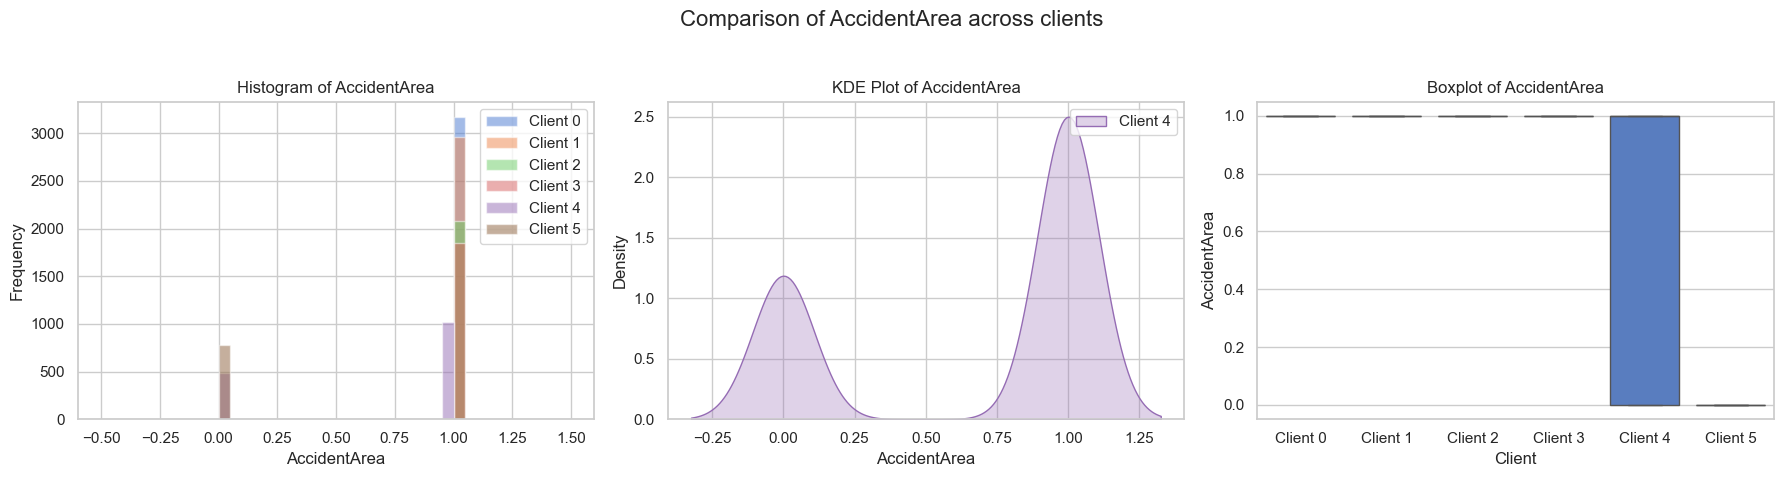

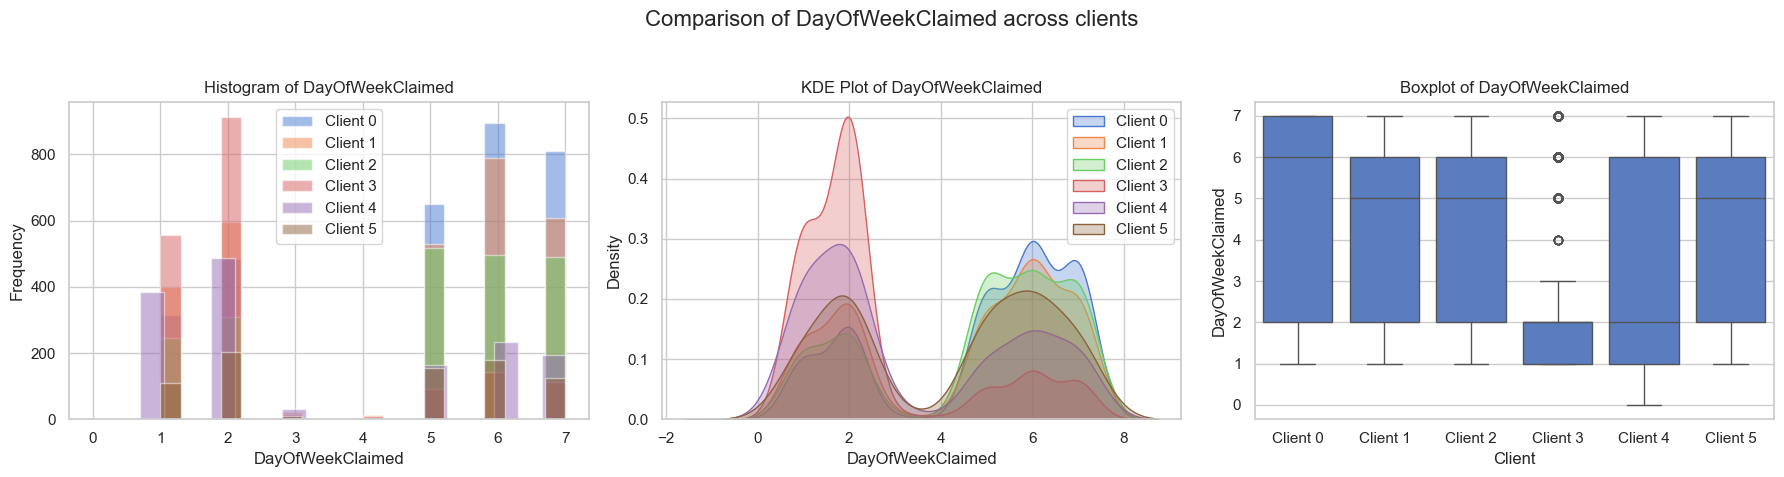

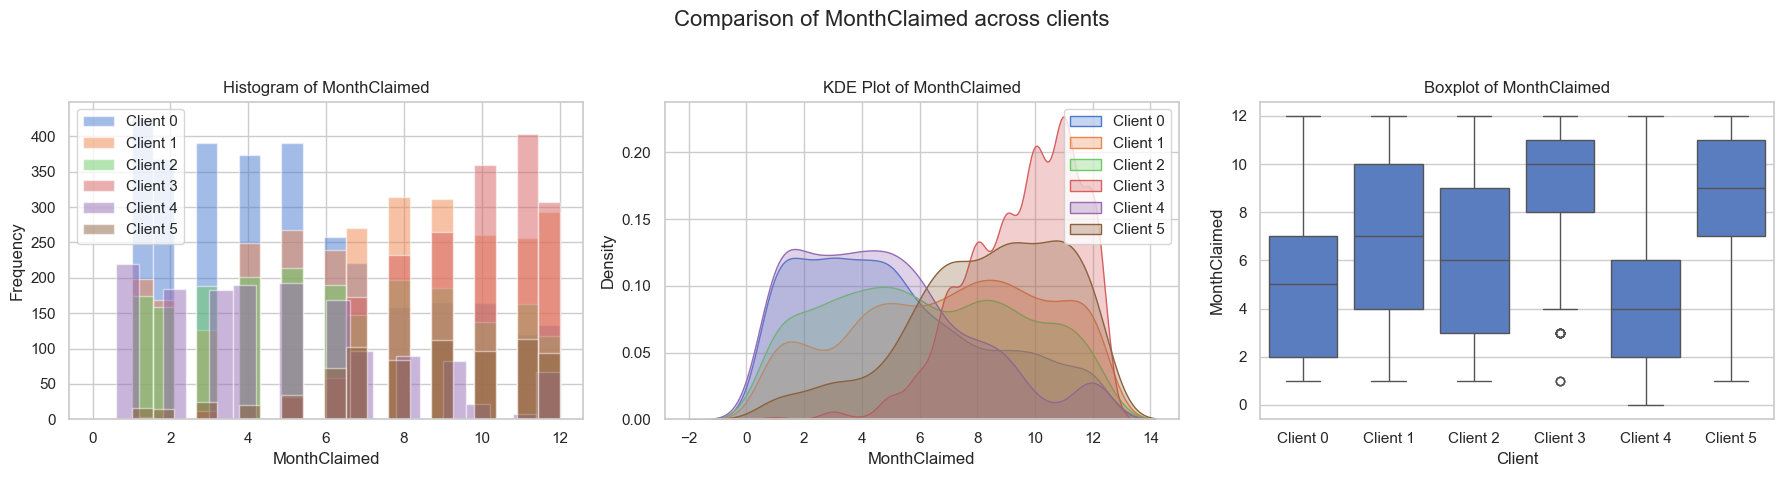

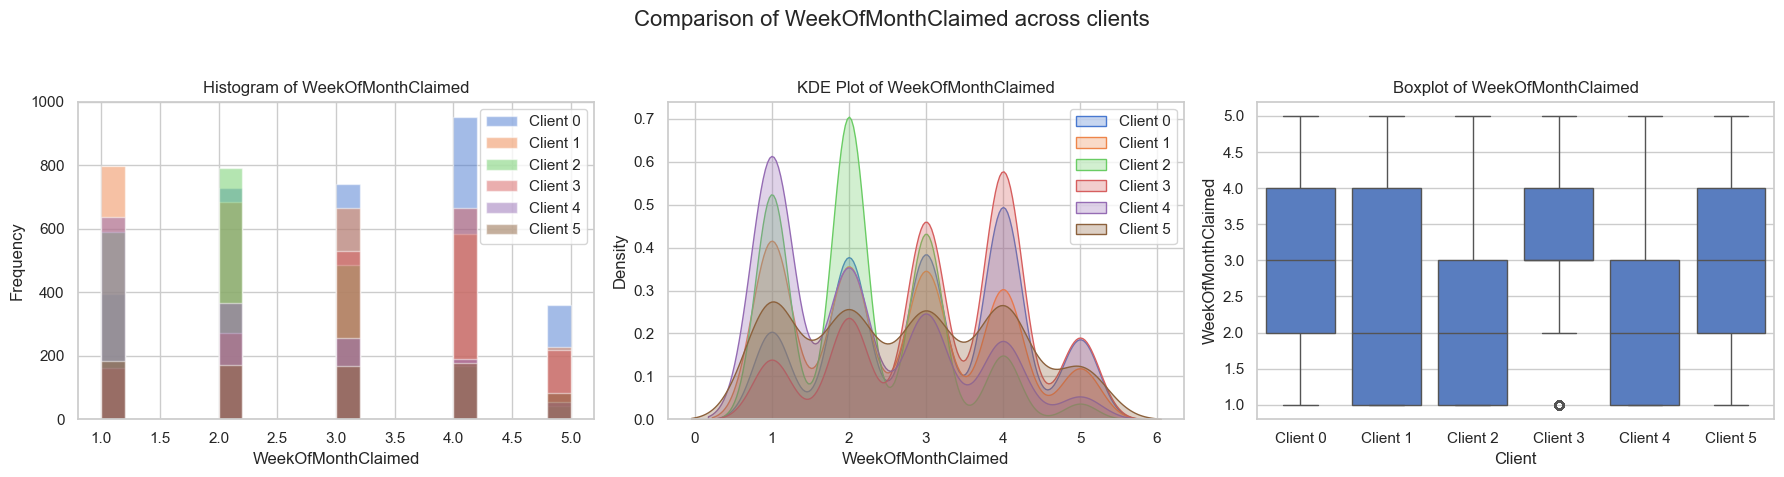

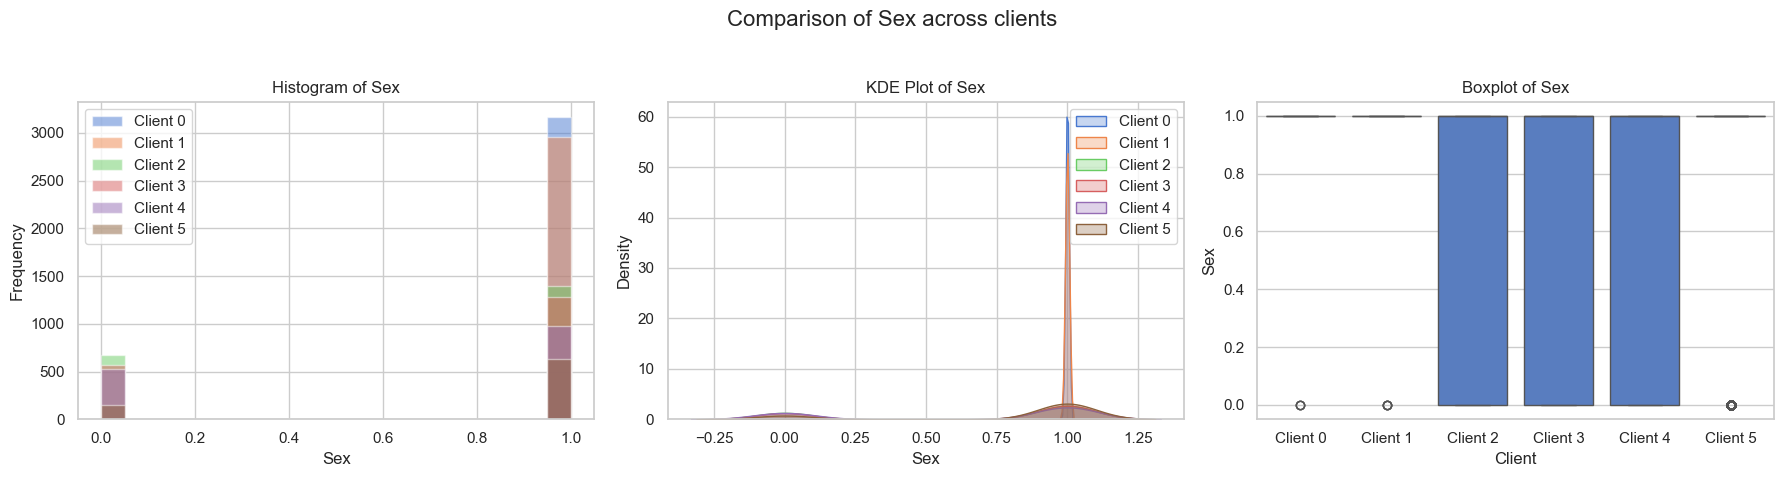

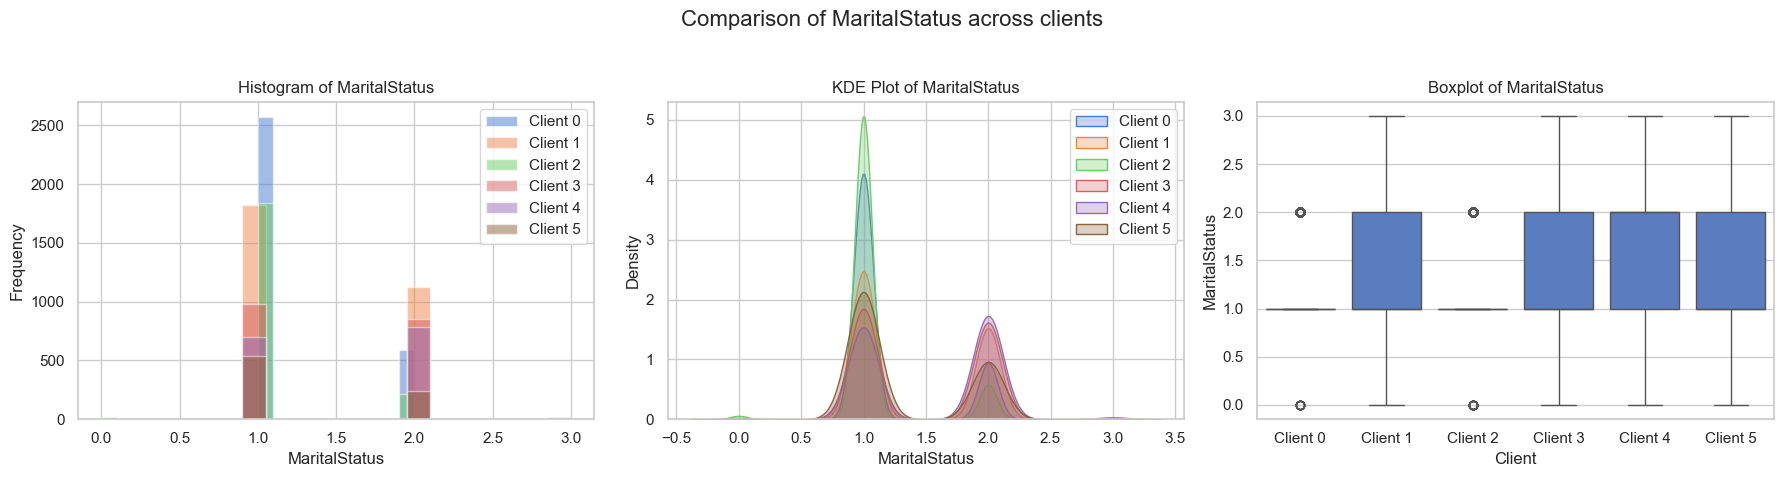

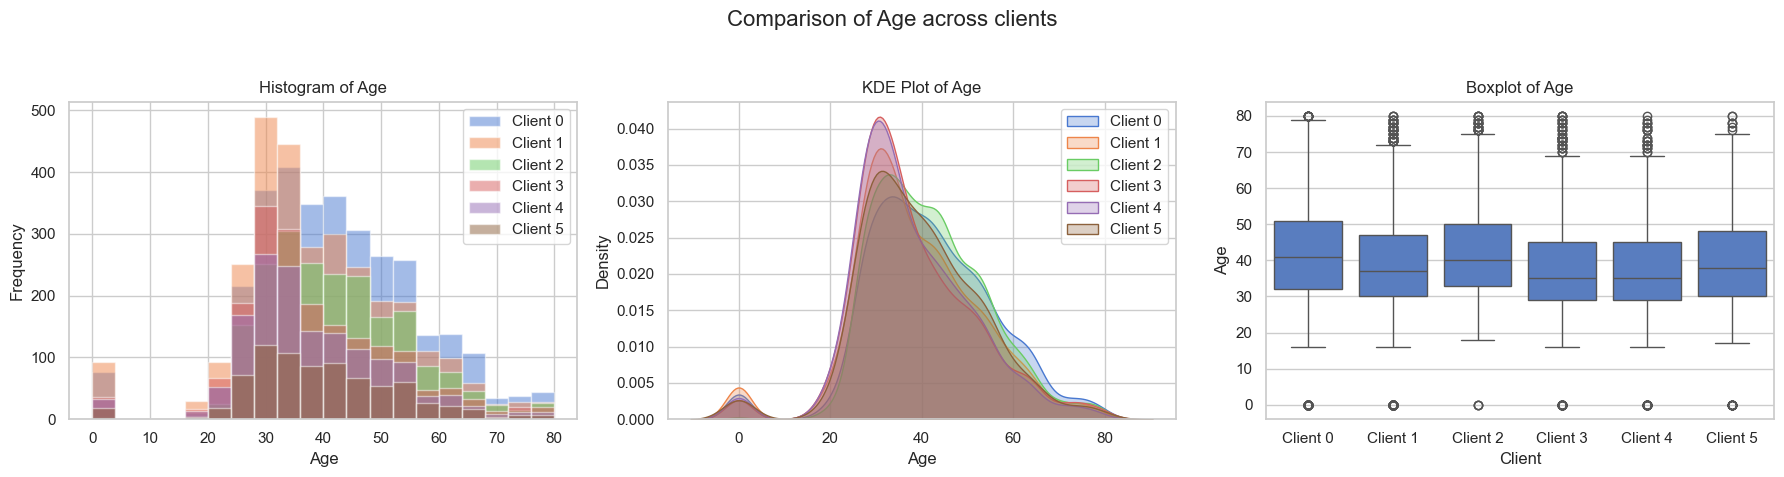

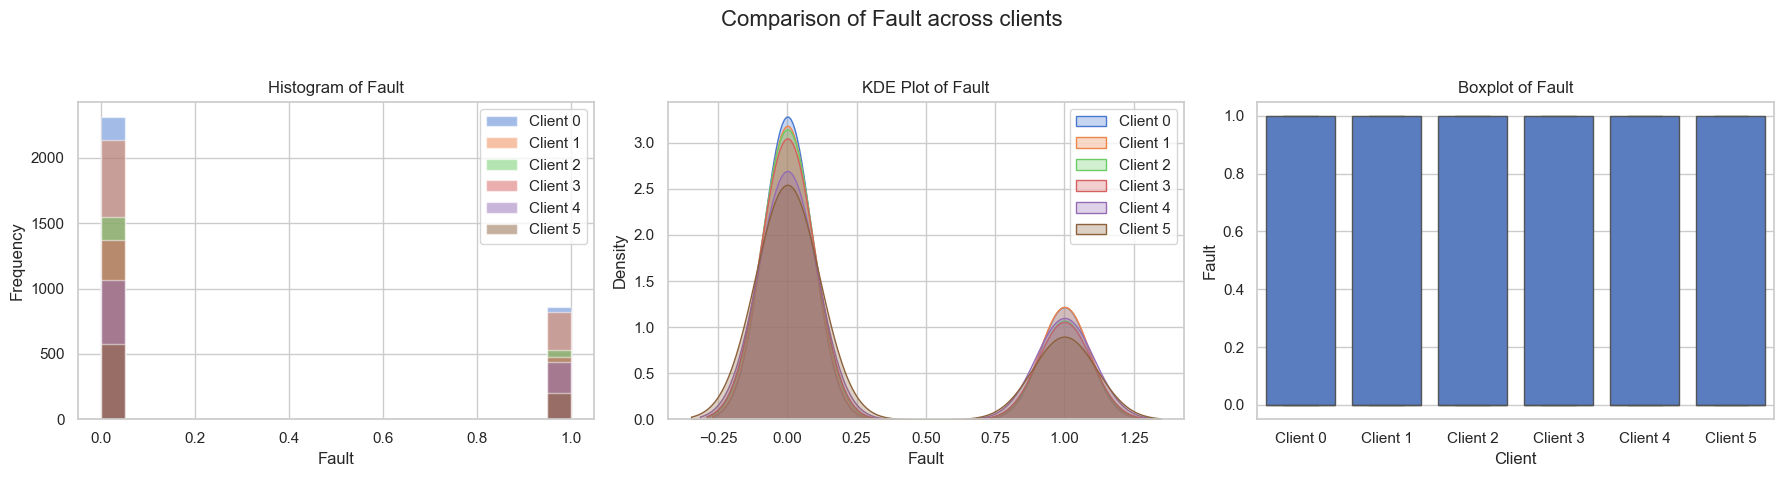

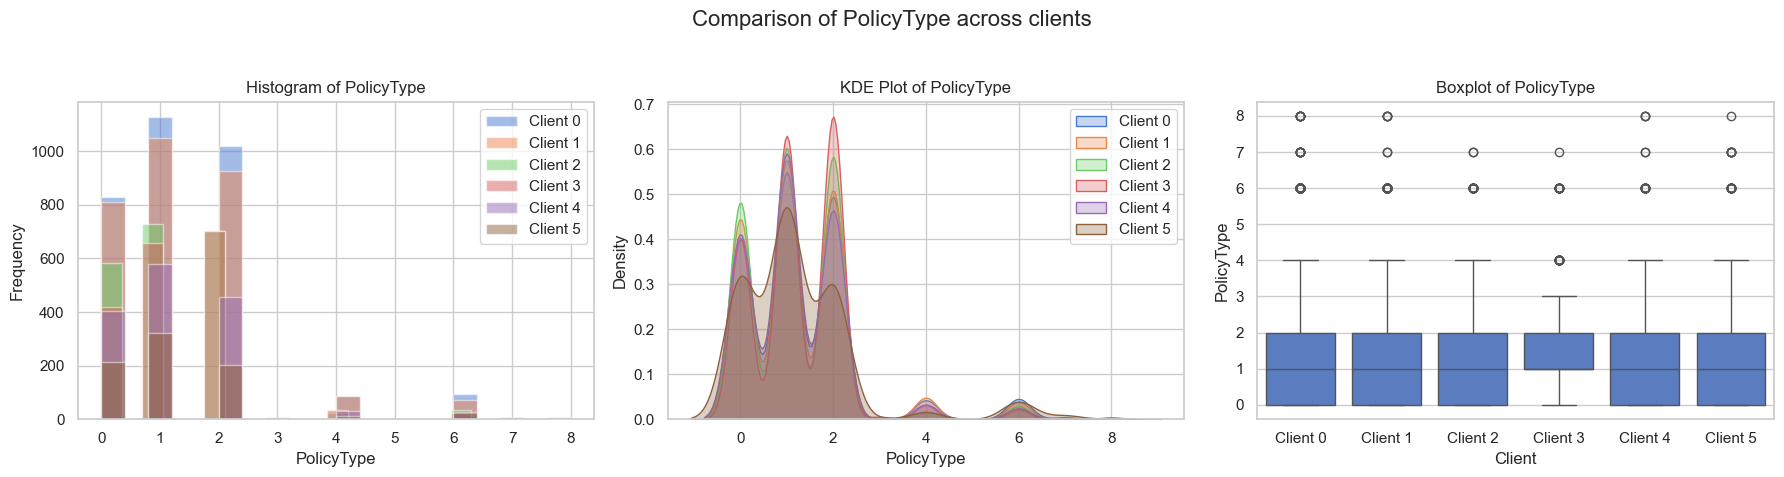

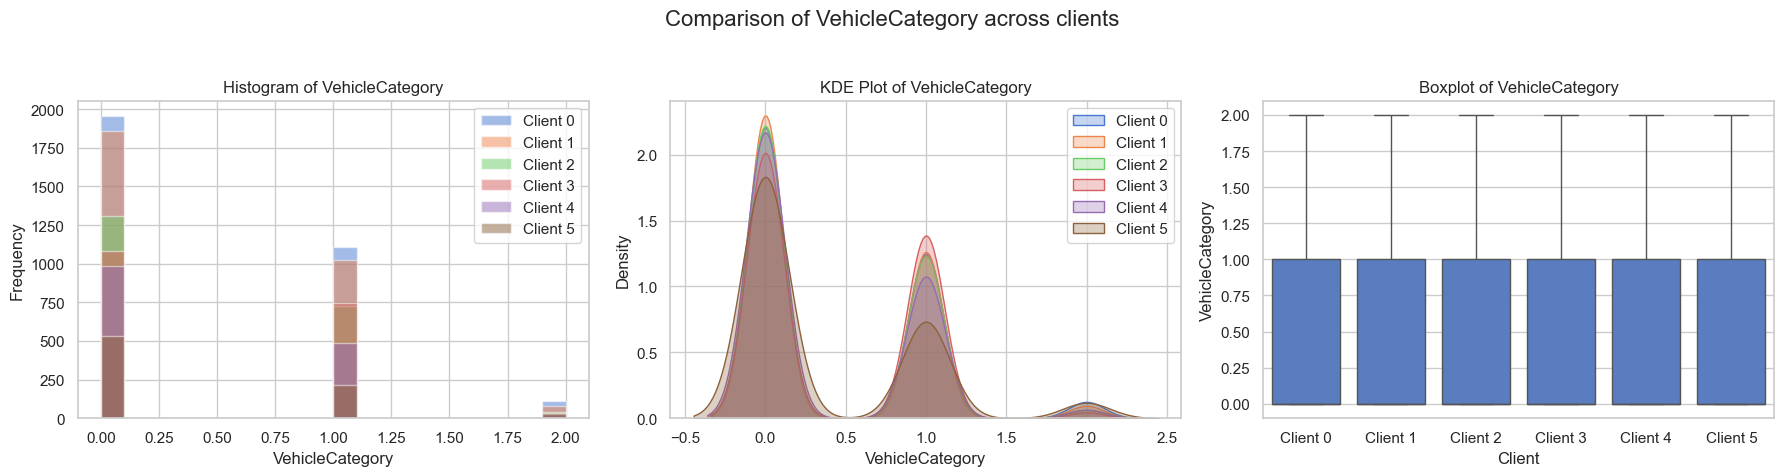

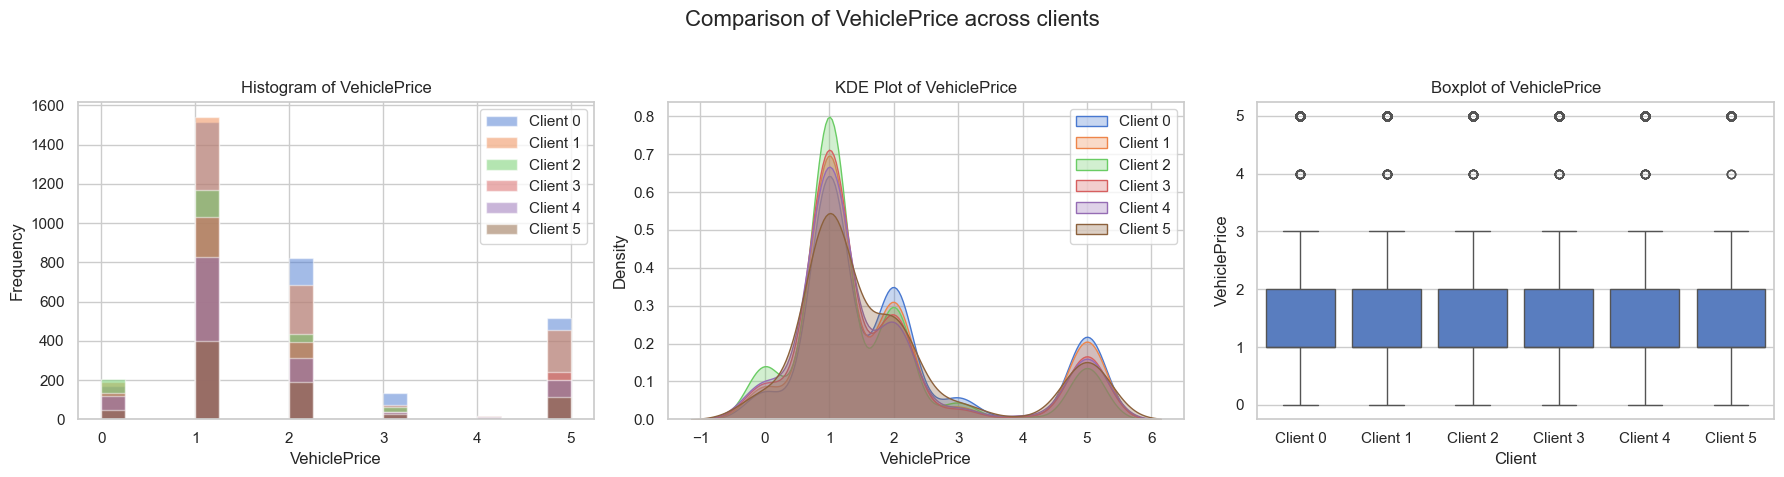

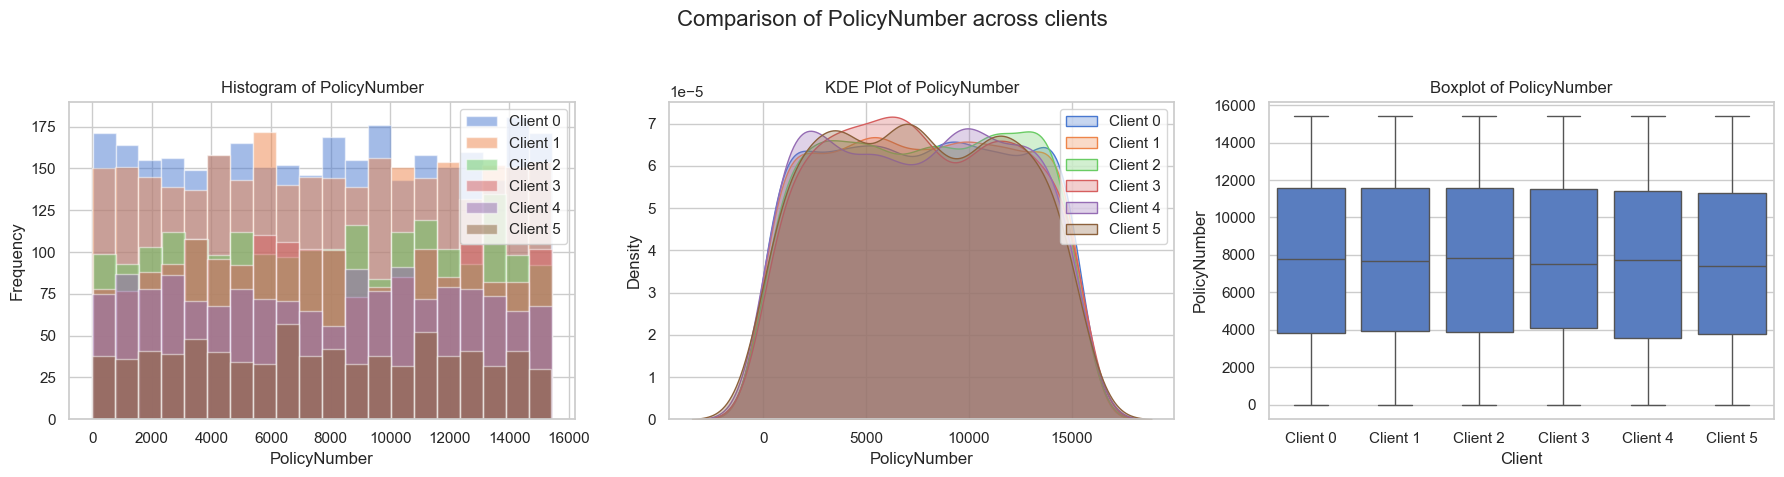

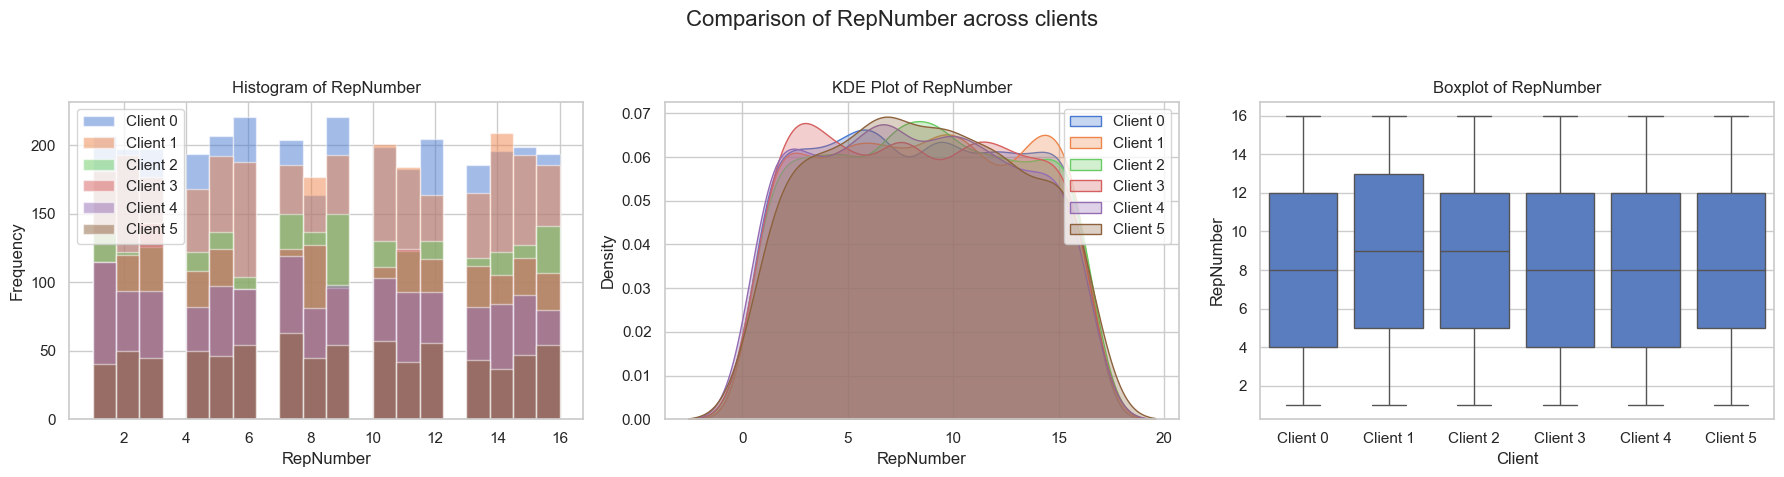

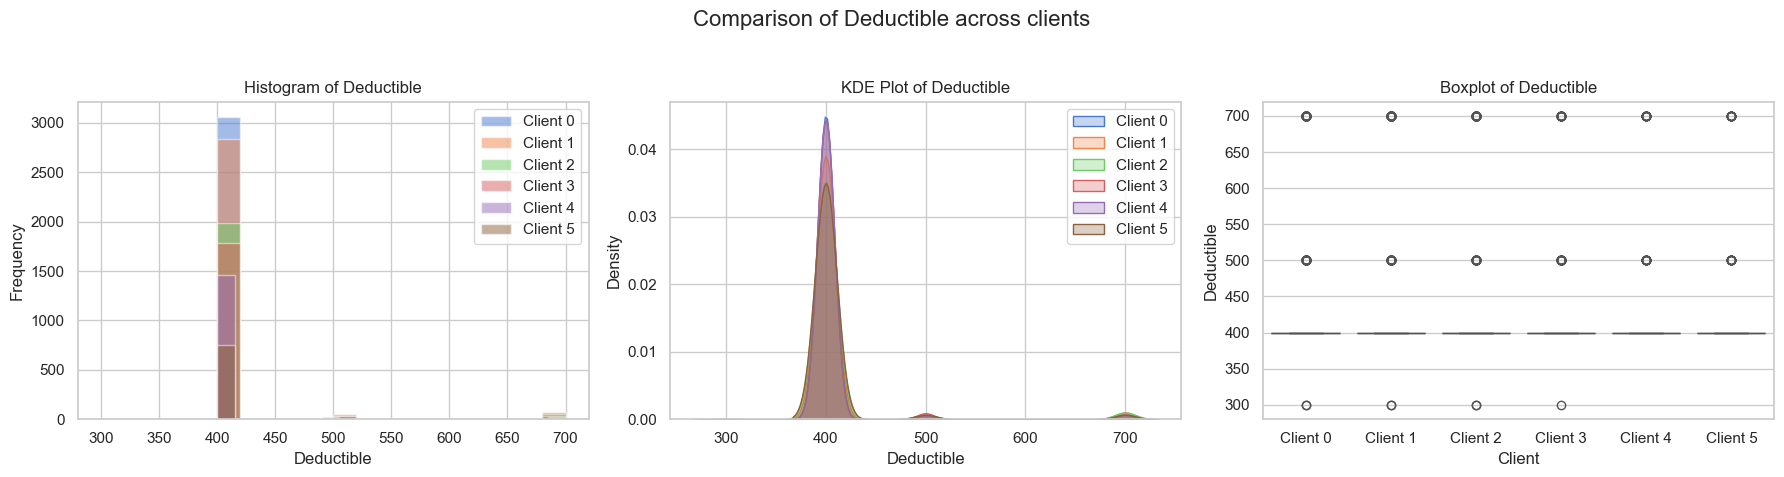

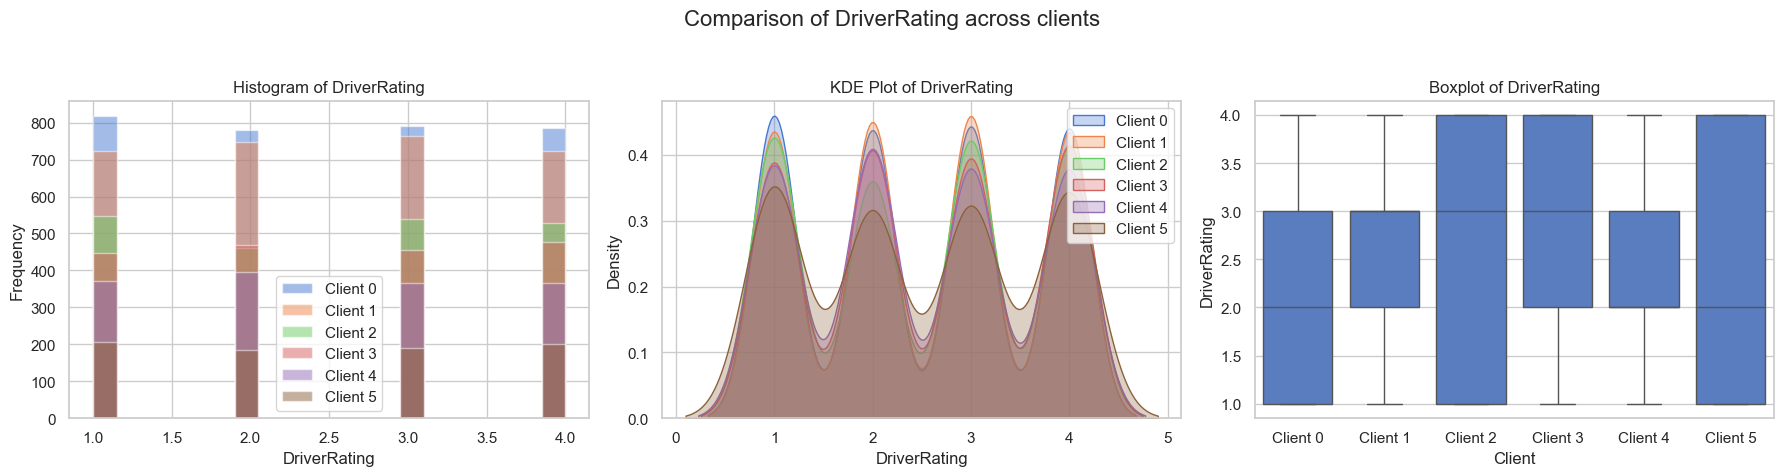

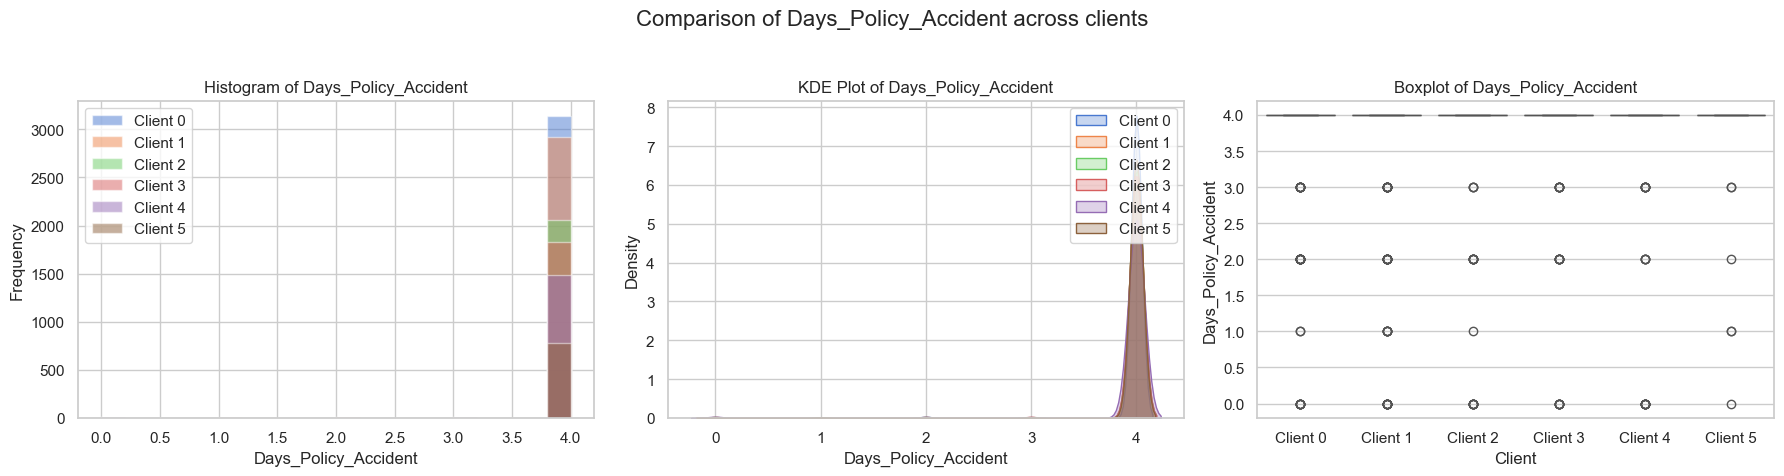

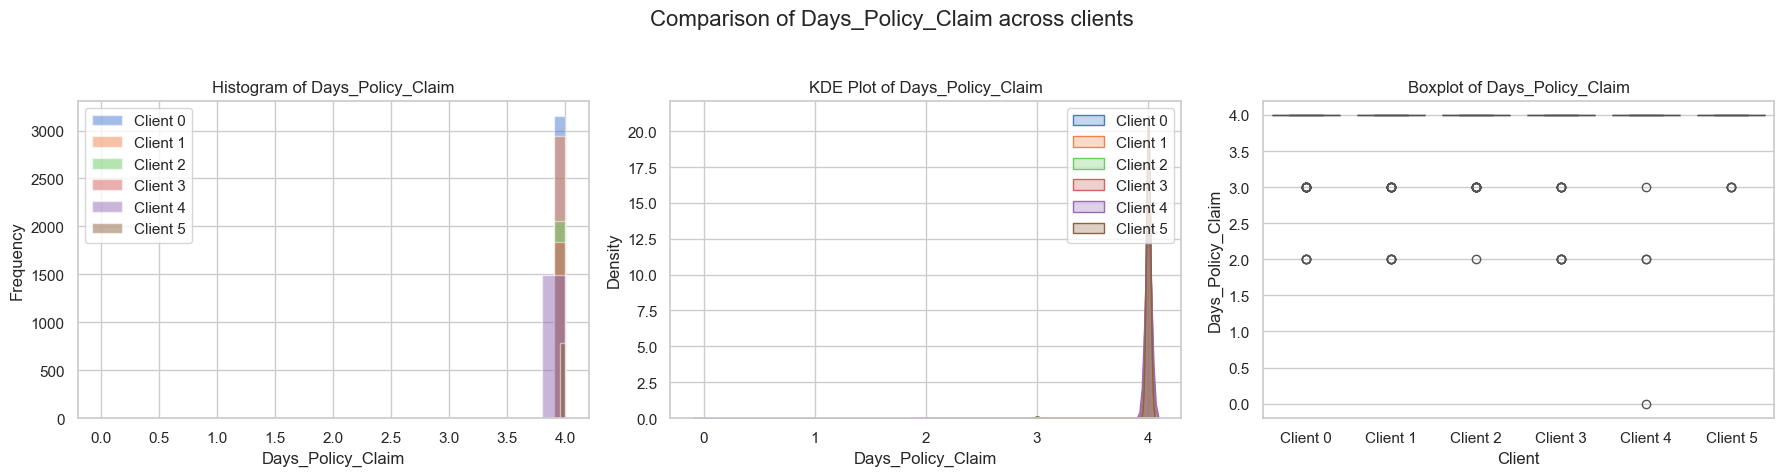

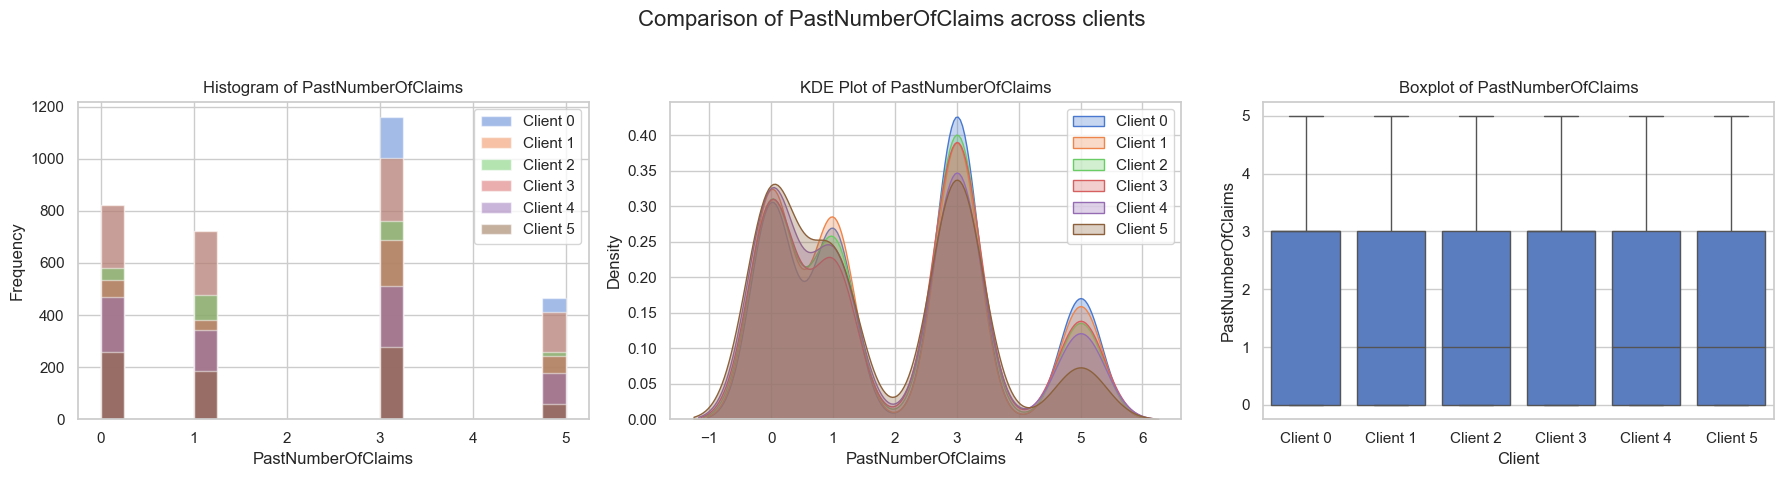

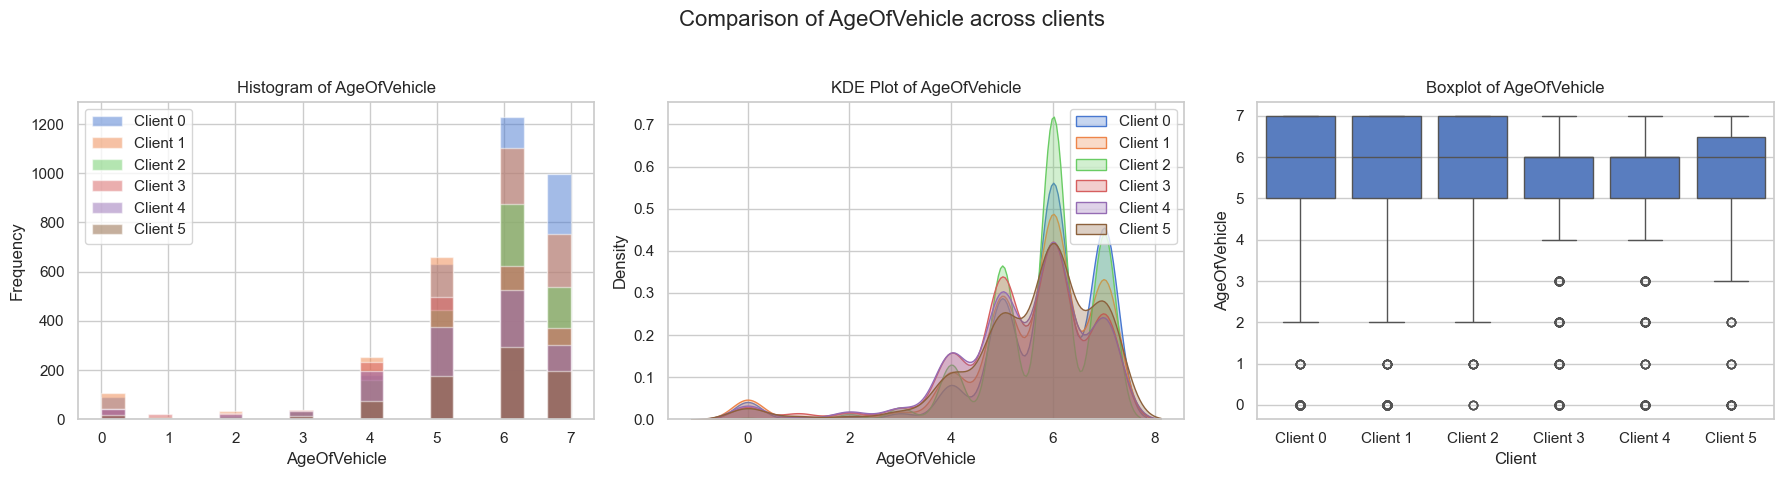

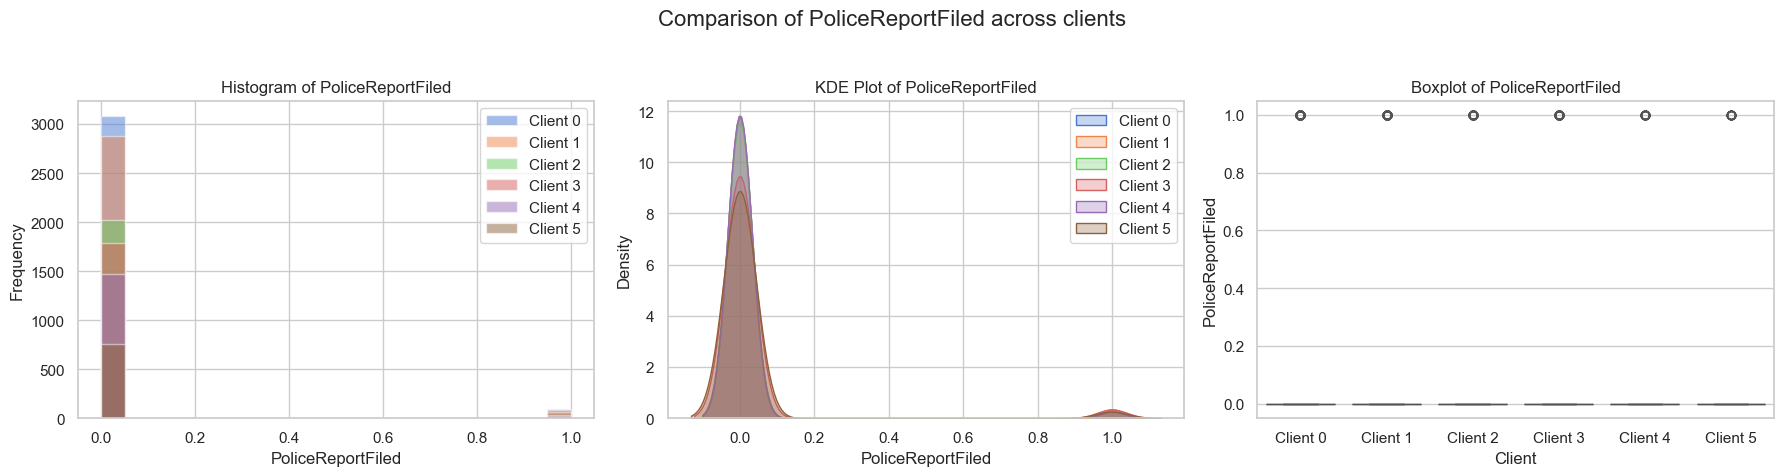

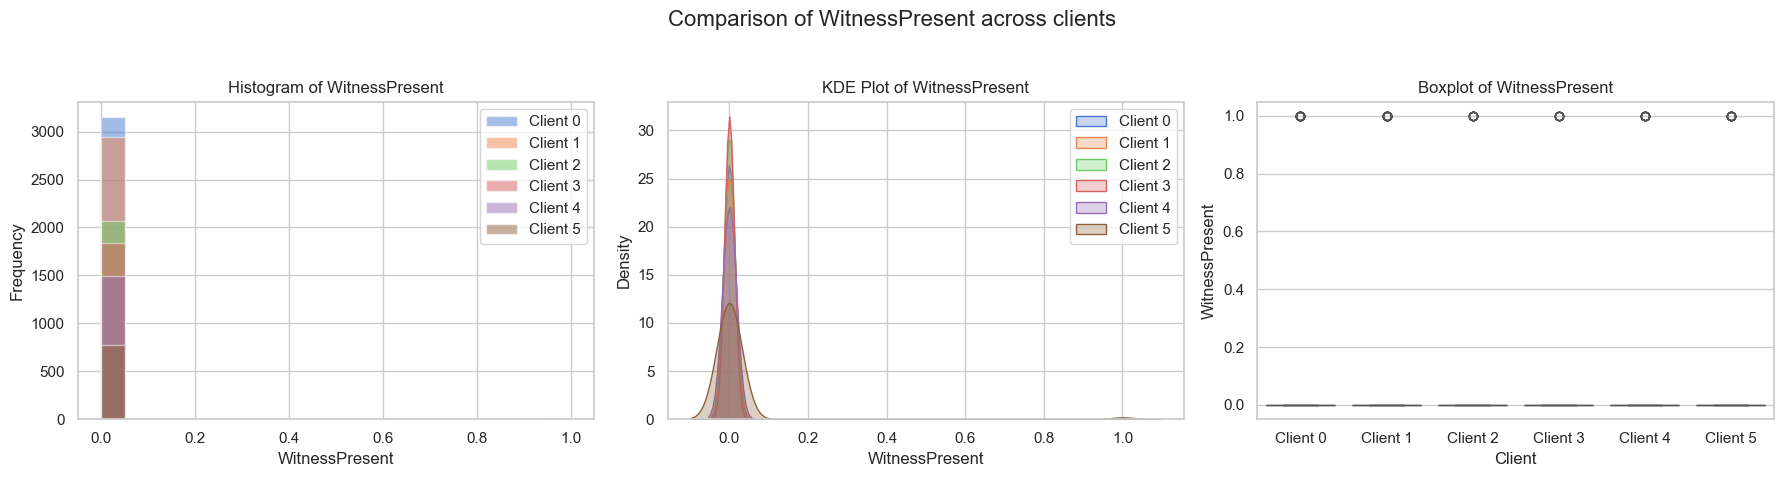

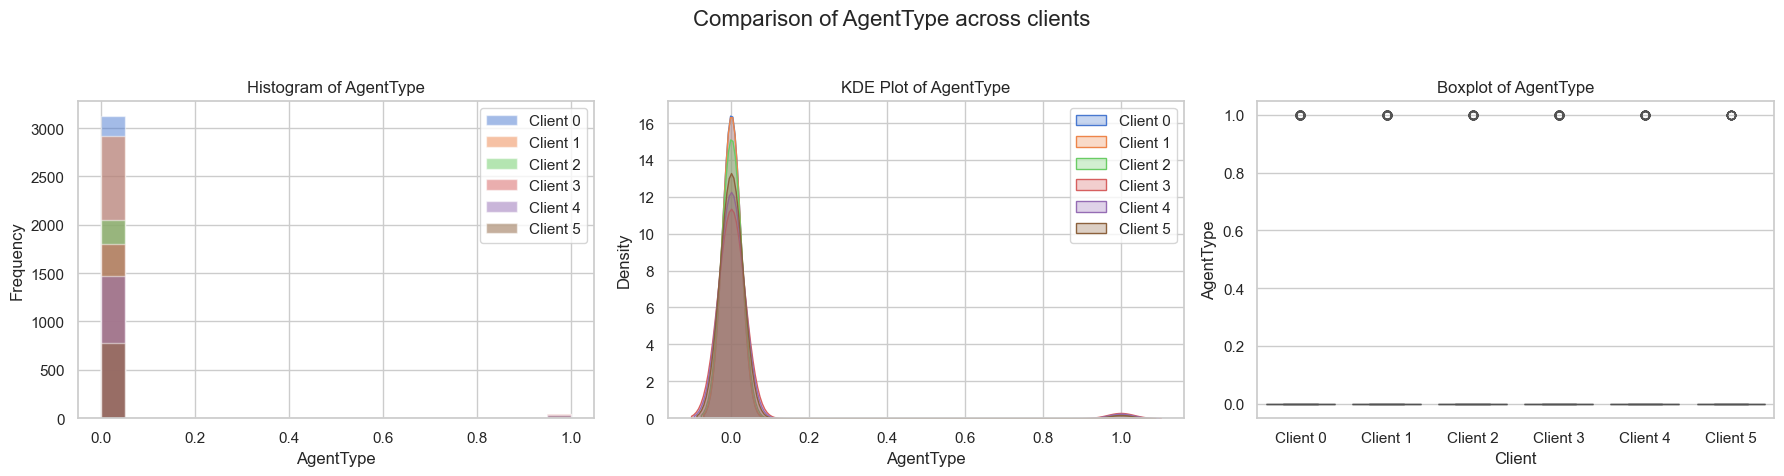

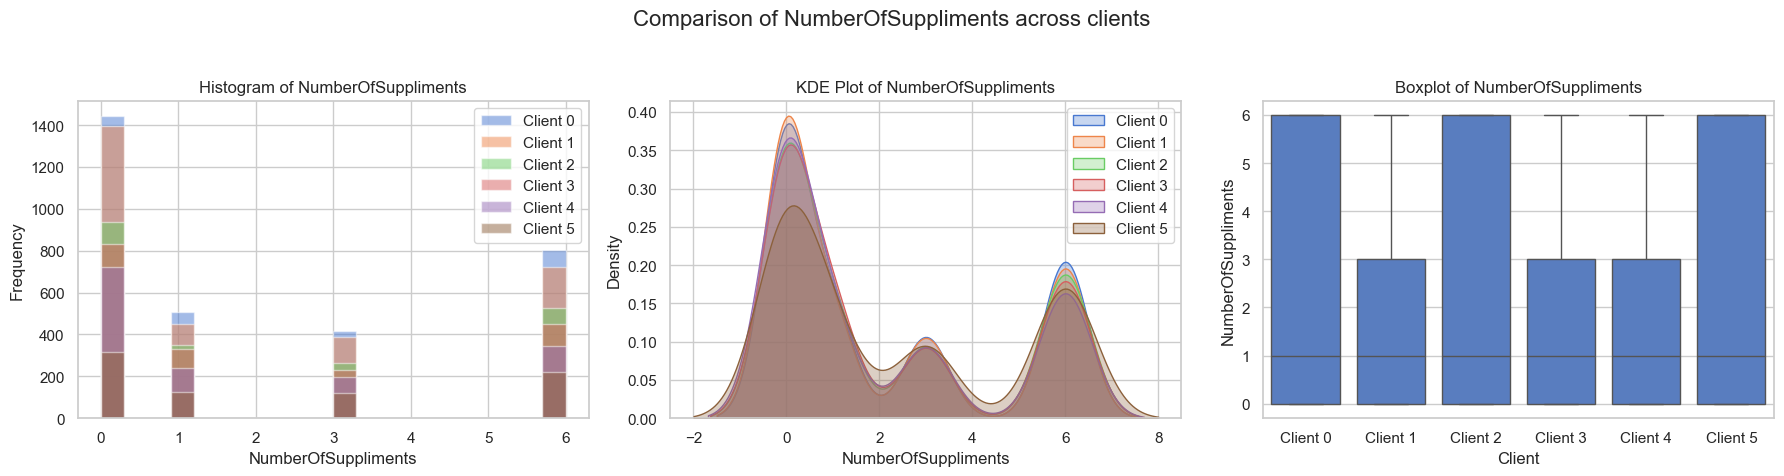

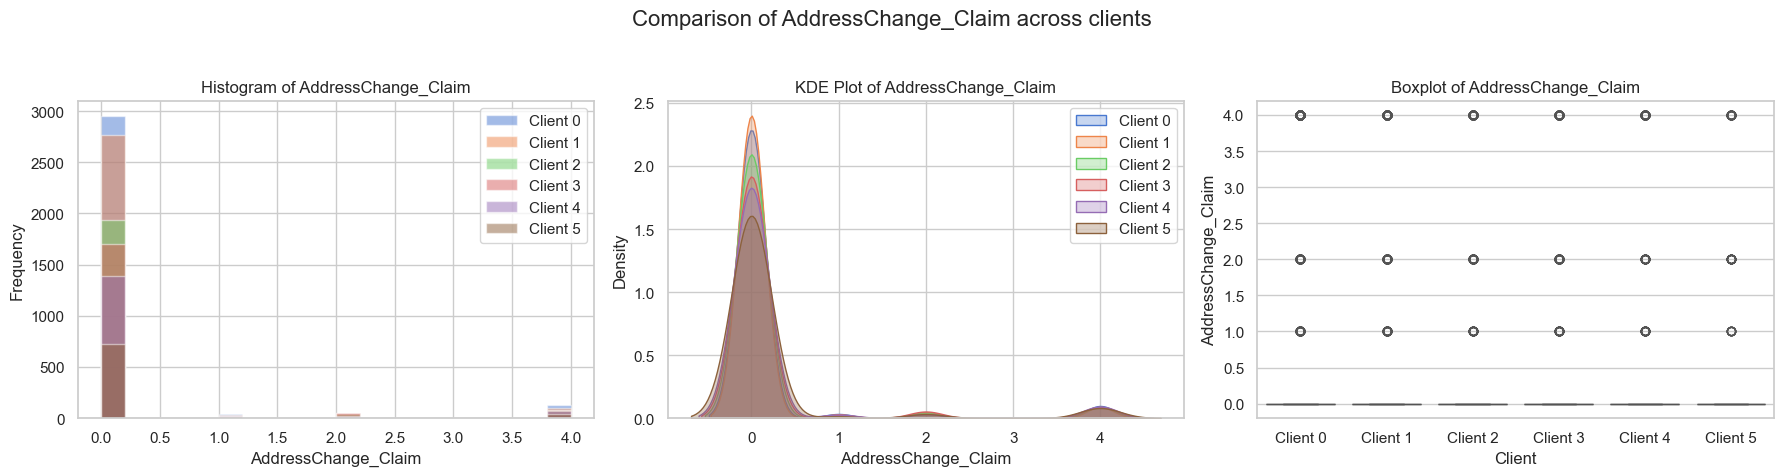

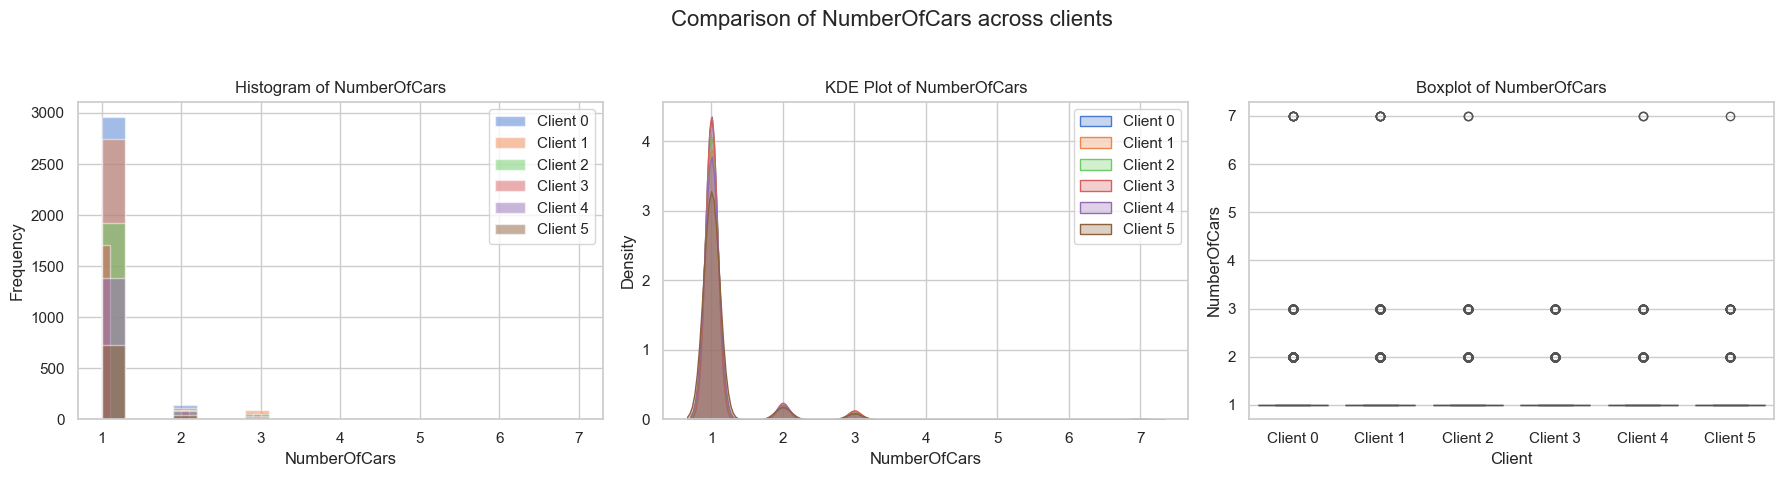

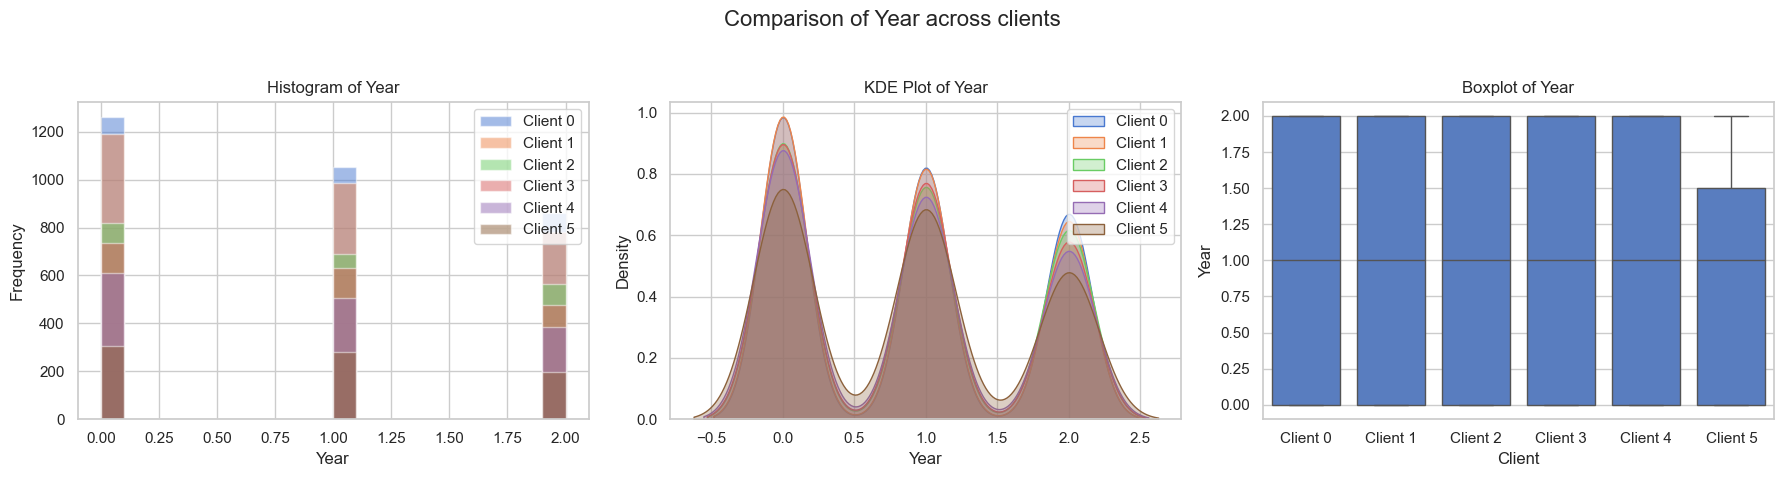

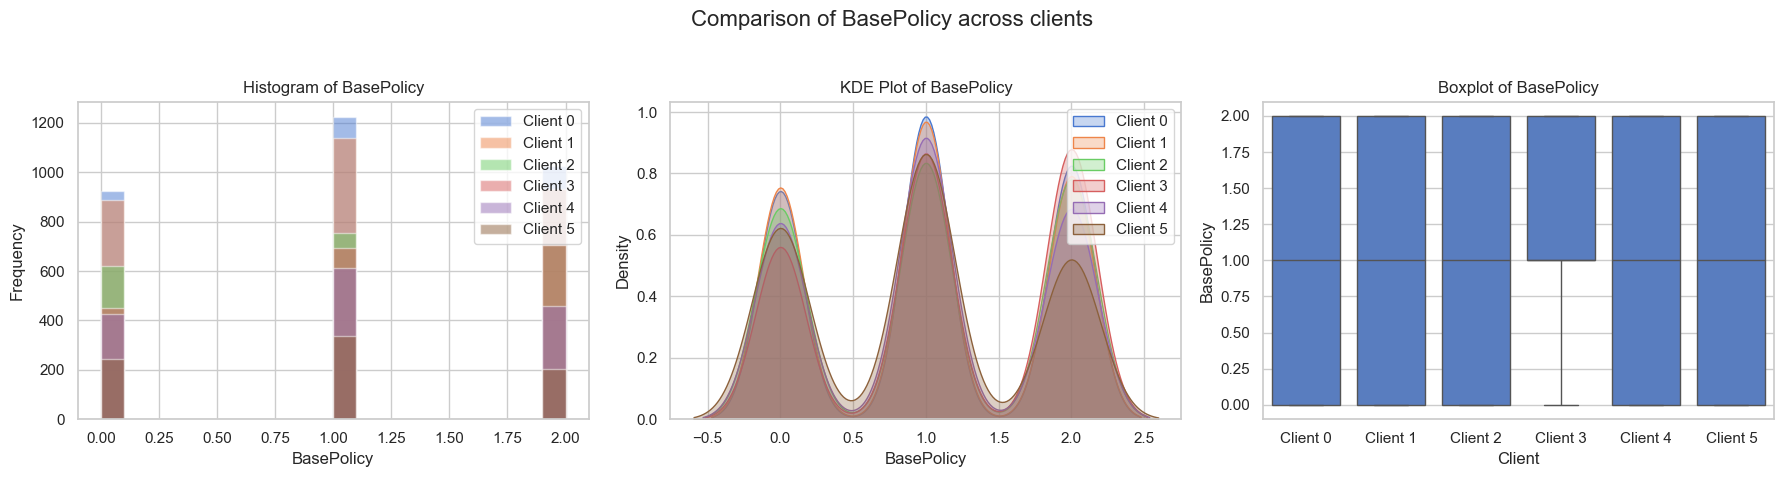

C:\Users\Астемир\AppData\Local\Temp\ipykernel_5744\256699521.py:9: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  [sns.kdeplot(client_datasets[i][feature], ax=axes[1], label=f'Client {i}', fill=True, alpha=0.3) for i in client_datasets]
C:\Users\Астемир\AppData\Local\Temp\ipykernel_5744\256699521.py:9: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  [sns.kdeplot(client_datasets[i][feature], ax=axes[1], label=f'Client {i}', fill=True, alpha=0.3) for i in client_datasets]
C:\Users\Астемир\AppData\Local\Temp\ipykernel_5744\256699521.py:9: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  [sns.kdeplot(client_datasets[i][feature], ax=axes[1], label=f'Client {i}', fill=True, alpha=0.3) for i in client_datasets]
C:\Users\Астемир\AppData\Local\Temp\ipykernel_5744\256699521.py:9: UserWarni

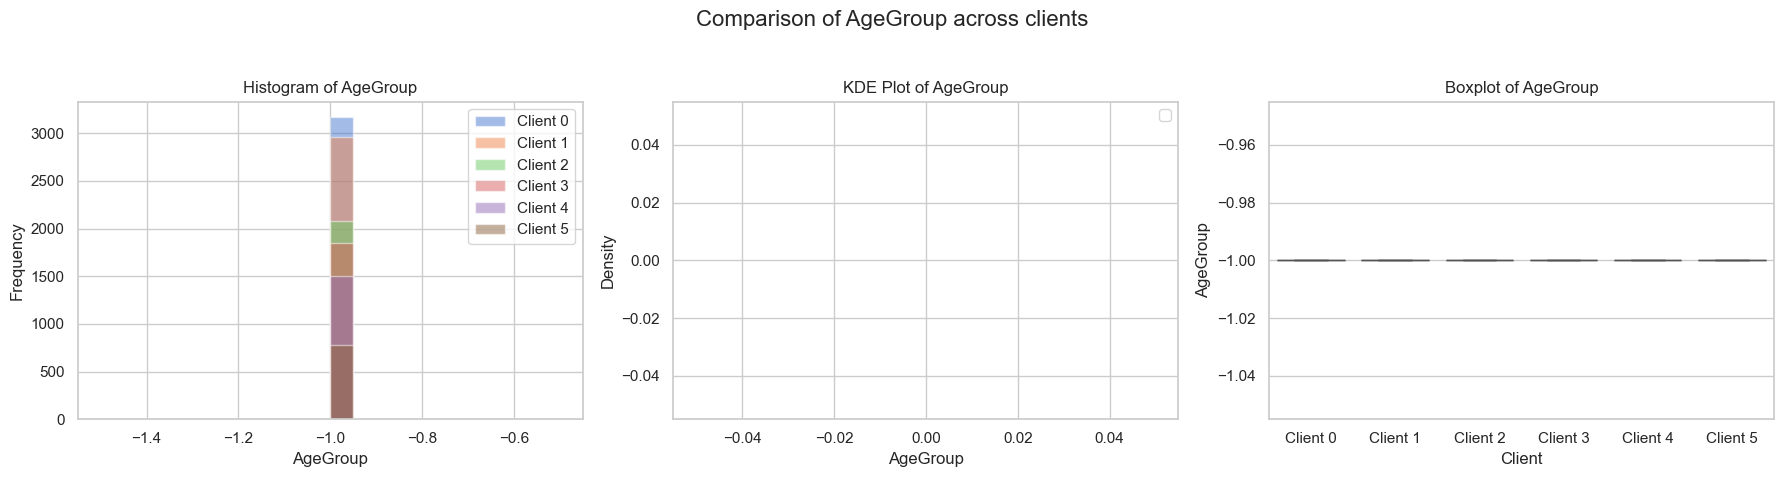

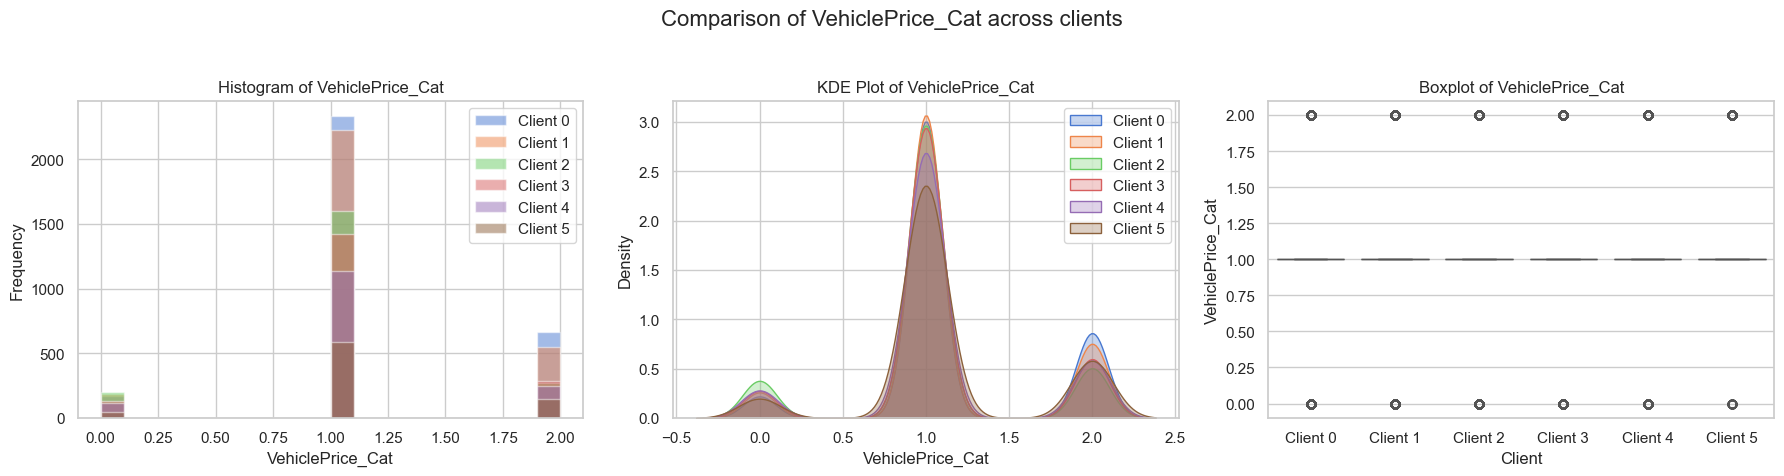

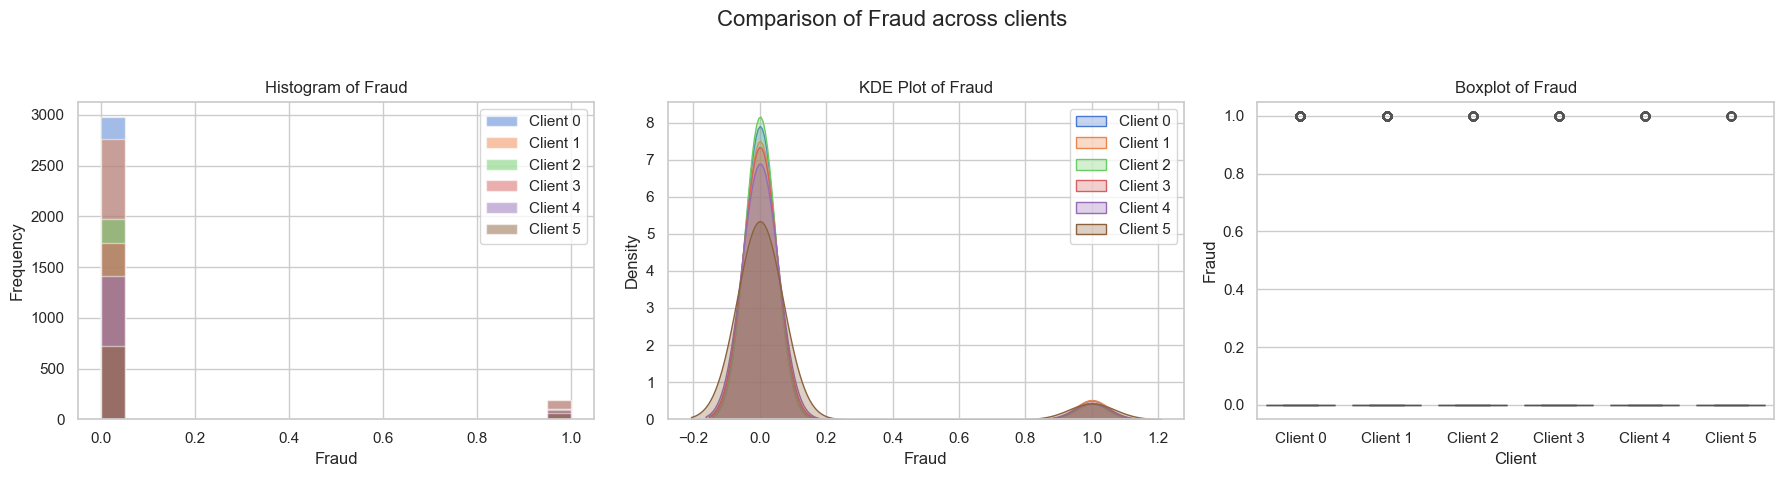

In [38]:
features = list(next(iter(client_datasets.values())).columns)
sns.set(style="whitegrid", palette="muted", color_codes=True)

for feature in features:
    fig, axes = plt.subplots(1, 3, figsize=(18, 5))

    [client_datasets[i][feature].hist(ax=axes[0], alpha=0.5, label=f'Client {i}', bins=20) for i in client_datasets]
    axes[0].set(title=f'Histogram of {feature}', xlabel=feature, ylabel="Frequency"); axes[0].legend()
    [sns.kdeplot(client_datasets[i][feature], ax=axes[1], label=f'Client {i}', fill=True, alpha=0.3) for i in client_datasets]
    axes[1].set(title=f'KDE Plot of {feature}', xlabel=feature, ylabel="Density"); axes[1].legend()
    sns.boxplot(x='client', y=feature, data=pd.concat([client_datasets[i].assign(client=f'Client {i}') for i in client_datasets]), ax=axes[2])
    axes[2].set(title=f'Boxplot of {feature}', xlabel="Client", ylabel=feature)
    
    plt.suptitle(f'Comparison of {feature} across clients', fontsize=16)
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()

In [16]:
cl_1, cl_2, cl_3, cl_4, cl_5, cl_6 = client_datasets[0], client_datasets[1], client_datasets[2], client_datasets[3], client_datasets[4], client_datasets[5]

In [12]:
from model import LogisticRegressionModel
from tools import train, eval, prepare_data

In [14]:
test_sample = pd.read_csv(os.path.join("data", "TEST_SAMPLE.csv"))

In [20]:
test_sample.head()

Month  WeekOfMonth  DayOfWeek  Make  AccidentArea  DayOfWeekClaimed  \
0      3            3          1    13             1                 6   
1      6            3          0     9             1                 7   
2      4            4          6    17             1                 7   
3      4            3          1    13             1                 7   
4      6            3          1    13             1                 2   

   MonthClaimed  WeekOfMonthClaimed  Sex  MaritalStatus  ...  WitnessPresent  \
0             8                   2    1              0  ...               0   
1             7                   4    1              1  ...               0   
2             4                   1    1              1  ...               0   
3             4                   1    1              1  ...               0   
4             7                   3    1              2  ...               0   

   AgentType  NumberOfSuppliments  AddressChange_Claim  NumberOfCars  Year  \
0          0                    0                    0             1     0   
1          0                    0                    0             1     1   
2          0                    0                    0             1     0   
3          0                    0                    0             1     1   
4          0                    1                    0             1     0   

   BasePolicy  AgeGroup  VehiclePrice_Cat  Fraud  
0           2      -1.0                 0      0  
1           1      -1.0                 2      0  
2           2      -1.0                 1      0  
3           2      -1.0                 1      0  
4           1      -1.0                 2      0  

[5 rows x 34 columns]

In [25]:
def local_procces(df):
    train_loader, test_loader, input_dim = prepare_data(df, test_sample.drop(columns="Fraud"), test_sample.Fraud)
    model = LogisticRegressionModel(input_dim=input_dim)
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    train(model=model, train_loader=train_loader,lr=0.01, num_epochs=10, device=device)
    metrics = eval(model=model, test_loader=test_loader, device=device)
    return metrics

In [38]:
[type(i) for i in client_datasets.values()]

[pandas.core.frame.DataFrame,
 pandas.core.frame.DataFrame,
 pandas.core.frame.DataFrame,
 pandas.core.frame.DataFrame,
 pandas.core.frame.DataFrame,
 pandas.core.frame.DataFrame]

In [35]:
six_client_metrics = []
[six_client_metrics.append(local_procces(_)) for _ in client_datasets.values()] 

[None, None, None, None, None, None]

In [39]:
six_client_metrics

[{'logloss_test': 0.43073031326261146,
  'roc_auc_test': 0.7839721443527706,
  'accuracy_test': 0.7487029831387808,
  'f1_test': 0.22731804586241275},
 {'logloss_test': 0.56105397451688,
  'roc_auc_test': 0.785038086154882,
  'accuracy_test': 0.6783398184176395,
  'f1_test': 0.2225705329153605},
 {'logloss_test': 0.5504058903548588,
  'roc_auc_test': 0.7759621979756155,
  'accuracy_test': 0.6913099870298314,
  'f1_test': 0.2247557003257329},
 {'logloss_test': 0.6512416496106718,
  'roc_auc_test': 0.7764182545700672,
  'accuracy_test': 0.6368352788586251,
  'f1_test': 0.2297111416781293},
 {'logloss_test': 0.43195714387523615,
  'roc_auc_test': 0.7365820729943916,
  'accuracy_test': 0.772697795071336,
  'f1_test': 0.22024471635150167},
 {'logloss_test': 0.4495825332582991,
  'roc_auc_test': 0.7731245124990274,
  'accuracy_test': 0.76621271076524,
  'f1_test': 0.2354188759278897}]

In [ ]:
results = {
f"{len(features.to_list())}_features": [
        local_procces(client_df)
        for client_df in feature_skew_split(datanoniid, features.to_list()).values()
    ]
    for features in features_set
}


In [69]:
results

{'5_features': [{'logloss_test': 0.5015528307451095,
   'roc_auc_test': 0.7647489969469545,
   'accuracy_test': 0.6880674448767834,
   'f1_test': 0.21661237785016288},
  {'logloss_test': 0.5034341565817322,
   'roc_auc_test': 0.7766770485899345,
   'accuracy_test': 0.7169260700389105,
   'f1_test': 0.224},
  {'logloss_test': 0.6022305539187666,
   'roc_auc_test': 0.772382515658848,
   'accuracy_test': 0.6507782101167315,
   'f1_test': 0.22795698924731184},
  {'logloss_test': 0.5506164834309755,
   'roc_auc_test': 0.7819597041423331,
   'accuracy_test': 0.6605058365758755,
   'f1_test': 0.23184152604548788},
  {'logloss_test': 0.3994843422508203,
   'roc_auc_test': 0.7019398692999712,
   'accuracy_test': 0.8132295719844358,
   'f1_test': 0.2087912087912088},
  {'logloss_test': 0.49171424914945255,
   'roc_auc_test': 0.7298262822519785,
   'accuracy_test': 0.7477302204928664,
   'f1_test': 0.21095334685598377}],
 '6_features': [{'logloss_test': 0.5776406127334913,
   'roc_auc_test': 0.76

In [70]:
dfs = {prefix: pd.DataFrame(metrics_list) for prefix, metrics_list in results.items()}

In [74]:
dfs.keys()

dict_keys(['5_features', '6_features', '7_features', '8_features', '9_features', '10_features', '11_features', '12_features', '13_features', '14_features', '15_features', '16_features', '17_features', '18_features', '19_features'])

In [99]:
for key in sorted(dfs.keys(), key=lambda x: int(x.split('_')[0])):
    print(f"{key}:")
    print(dfs[key])
    print("\n")
 

5_features:
   logloss_test  roc_auc_test  accuracy_test   f1_test
0      0.501553      0.764749       0.688067  0.216612
1      0.503434      0.776677       0.716926  0.224000
2      0.602231      0.772383       0.650778  0.227957
3      0.550616      0.781960       0.660506  0.231842
4      0.399484      0.701940       0.813230  0.208791
5      0.491714      0.729826       0.747730  0.210953


6_features:
   logloss_test  roc_auc_test  accuracy_test   f1_test
0      0.577641      0.760735       0.666342  0.216299
1      0.545273      0.759278       0.697147  0.217755
2      0.558487      0.778116       0.685798  0.227888
3      0.418201      0.781516       0.766537  0.234043
4      0.447604      0.734311       0.773995  0.217733
5      0.432648      0.746927       0.785019  0.229965


7_features:
   logloss_test  roc_auc_test  accuracy_test   f1_test
0      0.492783      0.789968       0.708171  0.230769
1      0.518805      0.781690       0.685798  0.230342
2      0.540752      0.75